In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

%matplotlib inline
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.options.display.float_format = "{:,.2f}".format

import warnings
warnings.filterwarnings("ignore")

### 0.0 Import Dataset

In [2]:
# cust_Type_desc
cust_type_df = pd.read_excel('./inputs/CUST_TYPE_DESC.xlsx')
print(cust_type_df.shape)
cust_type_df.head(2)

(22, 2)


cust_type_cd                  cust_type_desc
0             1                A - เชื้อพระวงศ์
1             2  B - บริษัทในเครือธนาคารกรุงไทย

In [3]:
cust_type_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   cust_type_cd    22 non-null     int64 
 1   cust_type_desc  22 non-null     object
dtypes: int64(1), object(1)
memory usage: 480.0+ bytes


In [4]:
df = pd.read_csv('./inputs/23022024_APPSIN.csv', delimiter=',', encoding='TIS-620')
print(df.shape)
df.head(3)

(2207162, 21)


APPLY_NO      ID_NUMBER  CUST_TYPE_CD   APP_FINALIZE_DATE APP_STATUS_REASON ACC_DECISION PRODUCT_ID_DESC       DSR  OTHER_DSR  TOTAL_DSR  MONTHLY_INCOME  RECENT_INCOME  APPLY_AGE ASCORE_GRADE WAIVE_DOC_TYPE  LOAN_TYPE_ON_WAIVE                          OCCUPATION_DESC                    CLEAN_OCCUPATION_DESC                           company_desc                             business_desc  FINAL_INCOME
0  2110043307  1809900134533          8.00  18FEB2022:10:59:02               C06     Canceled              CC  6,300.17       0.00   6,300.17           16000            NaN         35           D+            NaN                 NaN  พนักงานบริษัท/พนักงานประจำ/ลูกจ้างประจำ  พนักงานบริษัท/พนักงานประจำ/ลูกจ้างประจำ  เอกชน (บริษัท / หจก. / หน่วยงานเอกชน)  บริการ / บันเทิง / ท่องเที่ยว / ภัตตาคาร     16,000.00
1  2111056084  3901200088537          8.00  04JAN2022:10:05:16               D30     Declined              RL 16,770.53     300.00  17,070.53           19250      25,750.00         44           B+            NaN                 NaN  พนักงานบริษัท/พนักงานประจำ/ลูกจ้างประจำ  พนักงานบริษัท/พนักงานประจำ/ลูกจ้างประจำ  เอกชน (บริษัท / หจก. / หน่วยงานเอกชน)        การค้าปลีก / ค้าส่ง/ห้างสรรพสินค้า     19,250.00
2  2111065875  1279800073881          5.00  04JAN2022:15:07:17               D17     Declined              CC  3,585.00       0.00   3,585.00           18955      24,341.00         24            C            NaN                 NaN  พนักงานบริษัท/พนักงานประจำ/ลูกจ้างประจำ  พนักงานบริษัท/พนักงานประจำ/ลูกจ้างประจำ  เอกชน (บริษัท / หจก. / หน่วยงานเอกชน)                           อสังหาริมทรัพย์     18,955.00

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2207162 entries, 0 to 2207161
Data columns (total 21 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   APPLY_NO               int64  
 1   ID_NUMBER              object 
 2   CUST_TYPE_CD           float64
 3   APP_FINALIZE_DATE      object 
 4   APP_STATUS_REASON      object 
 5   ACC_DECISION           object 
 6   PRODUCT_ID_DESC        object 
 7   DSR                    float64
 8   OTHER_DSR              float64
 9   TOTAL_DSR              float64
 10  MONTHLY_INCOME         int64  
 11  RECENT_INCOME          float64
 12  APPLY_AGE              int64  
 13  ASCORE_GRADE           object 
 14  WAIVE_DOC_TYPE         object 
 15  LOAN_TYPE_ON_WAIVE     float64
 16  OCCUPATION_DESC        object 
 17  CLEAN_OCCUPATION_DESC  object 
 18  company_desc           object 
 19  business_desc          object 
 20  FINAL_INCOME           float64
dtypes: float64(7), int64(3), object(11)
memory usage: 353.

In [6]:
df.columns

Index(['APPLY_NO', 'ID_NUMBER', 'CUST_TYPE_CD', 'APP_FINALIZE_DATE', 'APP_STATUS_REASON', 'ACC_DECISION', 'PRODUCT_ID_DESC', 'DSR', 'OTHER_DSR', 'TOTAL_DSR', 'MONTHLY_INCOME', 'RECENT_INCOME', 'APPLY_AGE', 'ASCORE_GRADE', 'WAIVE_DOC_TYPE', 'LOAN_TYPE_ON_WAIVE', 'OCCUPATION_DESC', 'CLEAN_OCCUPATION_DESC', 'company_desc', 'business_desc', 'FINAL_INCOME'], dtype='object')

#### Prep function for an EDA

In [7]:
def _null_summary(df, title="Null Value Summary", width=8, height=6, rotations=45):
    # Get null value counts
    null_counts = df.isnull().sum().sort_values(ascending=False)

    # Print detailed null value summary
    print(f"{title}:\n")
    null_cols = null_counts.index[null_counts > 0]  # Filter columns with null values
    for col in null_cols:
        count = null_counts[col]
        percent = 100 * count / len(df)
        print(f"- Column '{col}': {count} null values ({percent:.2f}%)")

    # Check if there are null values before plotting
    if null_counts.any():
        # Create and customize bar chart
        plt.figure(figsize=(width, height))
        null_counts.plot(kind='bar', color='coral', edgecolor='black')
        plt.title(title)
        plt.xlabel("Column")
        plt.ylabel("Number of Null Values")
        plt.xticks(rotation=rotations, ha='right')  # Rotate labels for better readability
        plt.tight_layout()
        plt.show()
    else:
        print("No null values found in the DataFrame.")

In [8]:
def calculate_percent(row):
  return (row / row.sum()) * 100

In [9]:
df.head(2)

APPLY_NO      ID_NUMBER  CUST_TYPE_CD   APP_FINALIZE_DATE APP_STATUS_REASON ACC_DECISION PRODUCT_ID_DESC       DSR  OTHER_DSR  TOTAL_DSR  MONTHLY_INCOME  RECENT_INCOME  APPLY_AGE ASCORE_GRADE WAIVE_DOC_TYPE  LOAN_TYPE_ON_WAIVE                          OCCUPATION_DESC                    CLEAN_OCCUPATION_DESC                           company_desc                             business_desc  FINAL_INCOME
0  2110043307  1809900134533          8.00  18FEB2022:10:59:02               C06     Canceled              CC  6,300.17       0.00   6,300.17           16000            NaN         35           D+            NaN                 NaN  พนักงานบริษัท/พนักงานประจำ/ลูกจ้างประจำ  พนักงานบริษัท/พนักงานประจำ/ลูกจ้างประจำ  เอกชน (บริษัท / หจก. / หน่วยงานเอกชน)  บริการ / บันเทิง / ท่องเที่ยว / ภัตตาคาร     16,000.00
1  2111056084  3901200088537          8.00  04JAN2022:10:05:16               D30     Declined              RL 16,770.53     300.00  17,070.53           19250      25,750.00         44           B+            NaN                 NaN  พนักงานบริษัท/พนักงานประจำ/ลูกจ้างประจำ  พนักงานบริษัท/พนักงานประจำ/ลูกจ้างประจำ  เอกชน (บริษัท / หจก. / หน่วยงานเอกชน)        การค้าปลีก / ค้าส่ง/ห้างสรรพสินค้า     19,250.00

In [10]:
pent_up = [0.01,0.05,0.1,0.25,0.5,0.75,0.9,0.95,0.99]

## 1. Create Features for analysis

In [11]:
# 1.1 Create RI features
    # replace null value in OTHER_DSR, DSR, TOTAL_DSR
df['OTHER_DSR'].fillna(0, inplace=True)
df['DSR'].fillna(0, inplace=True)
df['TOTAL_DSR'].fillna(0, inplace=True)
df['RI'] = df['MONTHLY_INCOME'] - df['TOTAL_DSR']

df['RI_15k'] = np.where( (df['FINAL_INCOME']<15000) & (df.RI < 2000), "Fail", "Pass")
df['RI_1530k'] = np.where( (df['FINAL_INCOME']>=15000)&(df['FINAL_INCOME']<30000)&(df['RI']<3000), "Fail", "Pass")
df['RI_30k'] = np.where( (df['FINAL_INCOME']>=30000)&(df['RI']<5000), "Fail", "Pass" )
df['INCOME_RANGE'] = df['FINAL_INCOME'].apply(lambda x: "<15k" if x < 15000
                                              else ( "15-30k" if (x >= 15000) & (x<30000)
                                                                 else "30k")
                                             )
# Create FLG for RI_BOT
df['RI_BOT'] = df.apply(
    lambda rw: "Pass" if (rw['INCOME_RANGE'] == "<15k" and rw['RI_15k'] == "Pass")  # Use "and" for string comparison
               else "Pass" if (rw['INCOME_RANGE'] == "15-30k" and rw['RI_1530k'] == "Pass")
               else "Pass" if (rw['INCOME_RANGE'] == "30k" and rw['RI_30k'] == "Pass")  # Use "rw" for consistency
               else "Fail",
    axis=1
)

# 1.2 Create DSR ratio
df['DSR_RATIO'] = df['TOTAL_DSR']/df['MONTHLY_INCOME']

# 1.3 Create AGE_bin
bin =[10,20,29,39,49,59,95]
labels = ['<20', '20-29', '30-39', '40-49', '50-59', '>=60']
# create bin of age uniformly by 10
df['age_bin'] = pd.cut(df['APPLY_AGE'], bins=bin, labels=labels)
df['age_bin'] = pd.cut(df['APPLY_AGE'], bins=bin, labels=labels)

# 1.4 Create cust_type_desc
df = df.merge(cust_type_df, left_on = 'CUST_TYPE_CD', right_on = 'cust_type_cd', how = 'left')
df.drop('cust_type_cd', axis= 1, inplace=True)

Null Value Summary:

- Column 'LOAN_TYPE_ON_WAIVE': 2204753 null values (99.89%)
- Column 'WAIVE_DOC_TYPE': 1976526 null values (89.55%)
- Column 'RECENT_INCOME': 1194996 null values (54.14%)
- Column 'cust_type_desc': 399821 null values (18.11%)
- Column 'CUST_TYPE_CD': 399811 null values (18.11%)
- Column 'ASCORE_GRADE': 115108 null values (5.22%)
- Column 'business_desc': 4454 null values (0.20%)
- Column 'company_desc': 2946 null values (0.13%)
- Column 'CLEAN_OCCUPATION_DESC': 2808 null values (0.13%)
- Column 'OCCUPATION_DESC': 2304 null values (0.10%)
- Column 'DSR_RATIO': 94 null values (0.00%)
- Column 'FINAL_INCOME': 16 null values (0.00%)
- Column 'age_bin': 1 null values (0.00%)


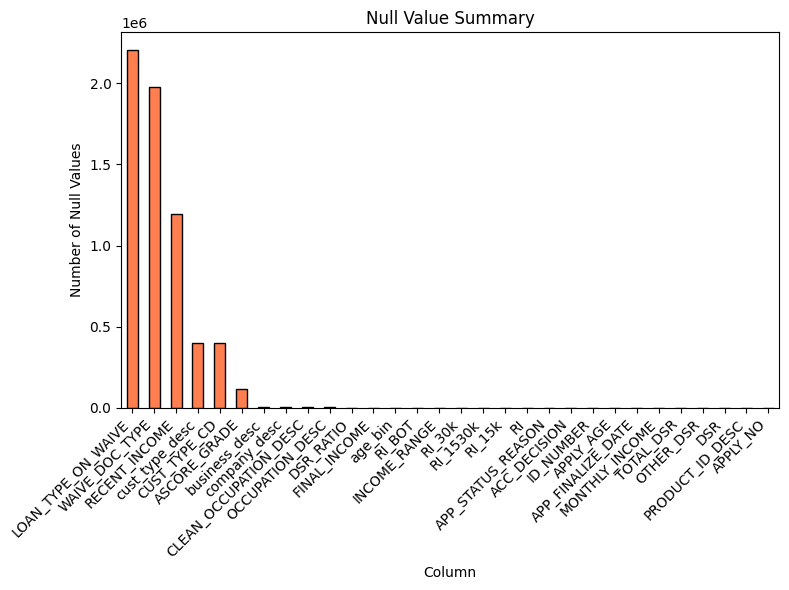

In [12]:
_null_summary(df )

## 2. Summary statistics of RI and Fail Rate

### 2.1 Overall

### 2.1.1 Summary Stat

In [13]:
df[['FINAL_INCOME', 'TOTAL_DSR', 'DSR_RATIO', 'RI']].describe(pent_up)

FINAL_INCOME     TOTAL_DSR    DSR_RATIO               RI
count     2,207,146.00  2,207,162.00 2,207,068.00     2,207,162.00
mean         36,959.60     11,618.25          inf        25,208.84
std       2,443,667.53     27,313.41          NaN     2,441,709.03
min    -194,313,216.00          0.00         0.00  -194,313,216.00
1%            8,333.00          0.00         0.00       -33,405.93
5%           12,000.00          0.00         0.00        -6,309.95
10%          13,321.00          0.00         0.00           545.29
25%          15,628.00        154.00         0.01         8,000.00
50%          20,000.00      5,031.72         0.23        14,309.00
75%          30,000.00     14,399.96         0.60        20,040.00
90%          50,000.00     29,089.40         0.98        34,100.00
95%          70,000.00     43,017.35         1.27        50,000.00
99%         205,188.96     90,478.88         2.32       186,192.84
max   2,212,041,113.00 11,911,693.67          inf 2,212,030,516.25

In [14]:
# 2.1 Overall

# two_gr = test[test.occupation_bin != 'reject'].groupby(['occupation_desc'])
def _plot_hist(frame, percentiles_upper, percentiles_lower):
    fig, ax = plt.subplots(figsize=(9, 5) )
    for i, feat in enumerate(['MONTHLY_INCOME', 'TOTAL_DSR', 'RI', 'DSR_RATIO']):
        if feat in ['TOTAL_DSR']:
            pent_low = np.percentile(frame[feat], 25)
        else:
            pent_up = np.percentile(frame[feat], percentiles_upper)
            pent_low = np.percentile(frame[feat], percentiles_lower)
        
        print(feat)
        sns.histplot(data = frame[(frame[feat] <= pent_up) & 
                                    (frame[feat] >= pent_low)], x=feat)
        # Customize plot
        plt.xlabel('Value')
        plt.ylabel('Number of observations')
        plt.title(f'Distribution of {feat}')
        # plt.legend()
        plt.show()

MONTHLY_INCOME


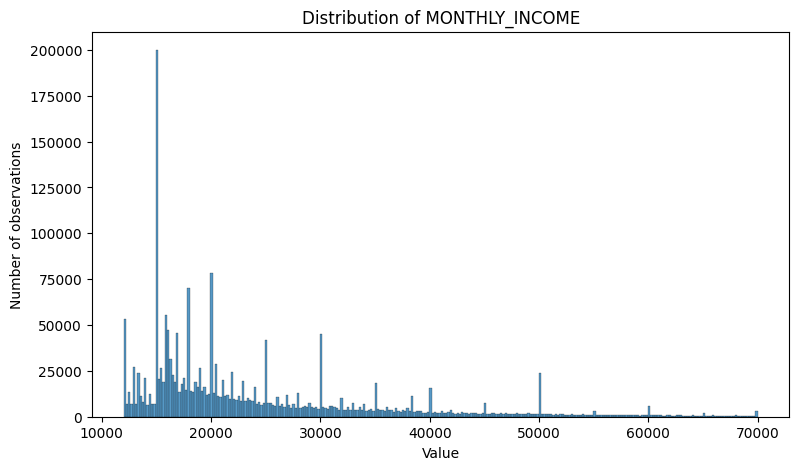

TOTAL_DSR


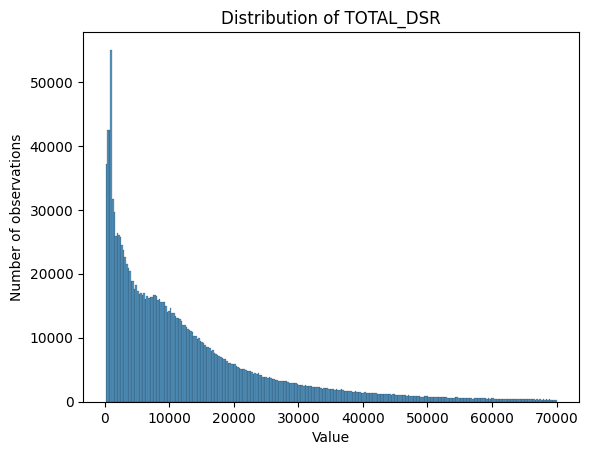

RI


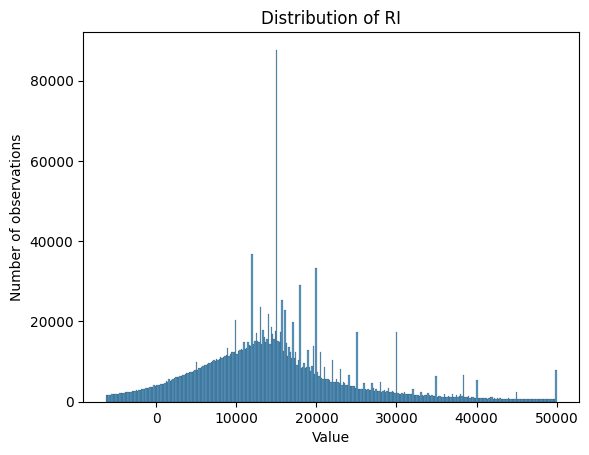

DSR_RATIO


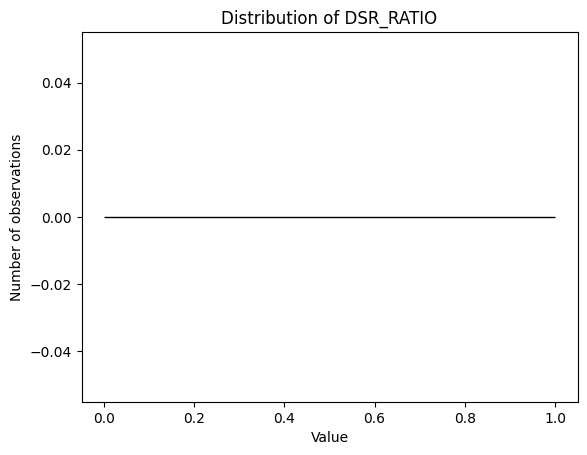

In [15]:
_plot_hist(frame=df , percentiles_upper = 95, percentiles_lower = 5)

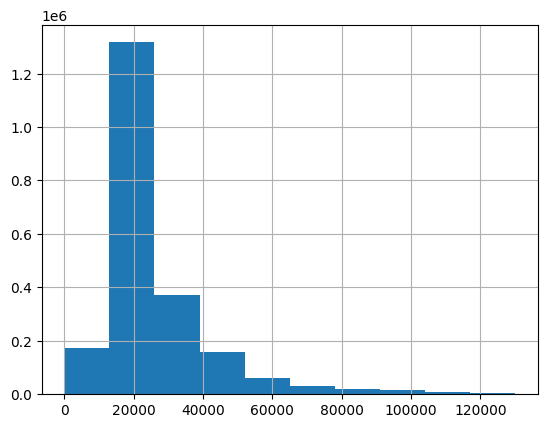

In [16]:
df[(df['FINAL_INCOME'] <= 130000) & (df['FINAL_INCOME'] >= 0)]['FINAL_INCOME'].hist()
plt.show()

In [17]:
# find the percentage of cut-off value
from scipy.stats import percentileofscore
print(f"Percentile of 2000 RI = { percentileofscore(df['RI'], 2000)}%")
print(f"Percentile of 3000 RI = { percentileofscore(df['RI'], 3000)}%")
print(f"Percentile of 5000 RI = { percentileofscore(df['RI'], 5000)}%")

Percentile of 2000 RI = 11.910838443213501%
Percentile of 3000 RI = 13.513303509212282%
Percentile of 5000 RI = 17.378923703833248%


In [18]:
# overall
print("All product")
print(df[['RI_BOT']].value_counts(normalize=True)*100 )
# CC
print("CC")
print(df[df.PRODUCT_ID_DESC == 'CC'][['RI_BOT']].value_counts(normalize=True)*100)
# RL
print("RL")
df[df.PRODUCT_ID_DESC == 'RL'][['RI_BOT']].value_counts(normalize=True)*100

All product
RI_BOT
Pass     86.31
Fail     13.69
Name: proportion, dtype: float64
CC
RI_BOT
Pass     86.75
Fail     13.25
Name: proportion, dtype: float64
RL


RI_BOT
Pass     85.81
Fail     14.19
Name: proportion, dtype: float64

#### 2.1.2 Fail Rate in RI (BOT)

In [19]:
# df.groupby(['RI_BOT'])[['MONTHLY_INCOME', 'TOTAL_DSR','RI']].describe(pent_up).T  
df.groupby(['RI_BOT'])[['RI']].describe(pent_up).T 

RI_BOT              Fail             Pass
RI count      302,077.00     1,905,085.00
   mean       -11,243.62        30,988.87
   std        356,842.30     2,624,281.85
   min   -194,313,216.00         2,000.00
   1%        -114,236.75         3,349.17
   5%         -43,296.55         5,271.00
   10%        -26,297.52         7,037.55
   25%        -10,961.30        11,038.00
   50%         -2,969.65        15,110.00
   75%            770.40        21,972.55
   90%          2,344.53        37,093.92
   95%          2,882.65        54,769.05
   99%          4,522.24       200,000.00
   max          4,999.83 2,212,030,516.25

In [20]:
# df.groupby(['ACC_DECISION'])[['MONTHLY_INCOME', 'TOTAL_DSR','RI']].describe(pent_up).T
df.groupby(['ACC_DECISION'])[['RI']].describe(pent_up).T

ACC_DECISION      Approved      Canceled         Declined
RI count        528,275.00    195,718.00     1,483,169.00
   mean          30,308.22     34,593.45        22,154.16
   std          158,758.73    287,381.21     2,975,281.10
   min       -9,932,395.67 -3,336,985.17  -194,313,216.00
   1%           -20,628.05    -27,318.69       -37,459.06
   5%             2,032.14        -42.45        -8,724.90
   10%            5,874.00      5,274.00        -1,487.95
   25%           11,648.88     11,778.94         6,328.95
   50%           16,885.67     16,682.78        12,782.75
   75%           25,950.00     25,828.45        18,000.00
   90%           45,839.36     46,216.03        28,452.59
   95%           77,992.69     79,821.37        40,000.00
   99%          267,323.74    332,964.03       119,056.09
   max       49,798,854.90 51,164,775.80 2,212,030,516.25

In [21]:
# df.groupby(['ACC_DECISION'])[['MONTHLY_INCOME', 'TOTAL_DSR','RI']].describe(pent_up).T
df.groupby(['ACC_DECISION'])[['DSR_RATIO']].describe(pent_up).T

ACC_DECISION      Approved   Canceled     Declined
DSR_RATIO count 528,275.00 195,671.00 1,483,122.00
          mean        0.32        inf          inf
          std         0.43        NaN          NaN
          min         0.00       0.00         0.00
          1%          0.00       0.00         0.00
          5%          0.00       0.00         0.00
          10%         0.00       0.00         0.00
          25%         0.04       0.00         0.00
          50%         0.20       0.13         0.25
          75%         0.52       0.47         0.67
          90%         0.76       0.75         1.07
          95%         0.93       1.00         1.38
          99%         1.54       2.09         2.63
          max        90.02        inf          inf

#### 2.1.2 IncomeRange in RI (BOT)

In [22]:
# All app-ins
df.groupby(['INCOME_RANGE'])[['RI']].describe(pent_up).T

INCOME_RANGE        15-30k              30k            <15k
RI count      1,317,767.00       589,614.00      299,781.00
   mean          12,059.95        63,906.17        6,897.77
   std           13,844.65     4,717,127.50      355,345.00
   min       -4,352,274.40    -9,932,395.67 -194,313,216.00
   1%           -20,514.22       -57,683.67      -29,784.94
   5%            -3,486.75       -15,548.81       -5,796.63
   10%            1,723.12        -3,216.28         -398.54
   25%            8,138.00        12,208.00        5,265.55
   50%           14,400.00        28,722.53       10,000.00
   75%           17,600.93        42,020.00       12,000.00
   90%           21,200.00        79,637.67       13,400.00
   95%           24,060.78       147,891.40       14,000.00
   99%           27,716.02       462,278.00       14,937.20
   max        1,063,154.00 2,212,030,516.25    2,549,107.00

In [23]:
# find the percentage of cut-off value
# from scipy.stats import percentileofscore
print(f"Percentile of 2000 RI = { percentileofscore(df[df.INCOME_RANGE == '<15k']['RI'], 2000)}%")
print(f"Percentile of 3000 RI = { percentileofscore(df[df.INCOME_RANGE == '15-30k']['RI'], 3000)}%")
print(f"Percentile of 5000 RI = { percentileofscore(df[df.INCOME_RANGE == '30k']['RI'], 5000)}%")

Percentile of 2000 RI = 14.810811892681658%
Percentile of 3000 RI = 12.138147335606371%
Percentile of 5000 RI = 16.579745392748475%


#### DSR| Analysis

In [24]:
df[['FINAL_INCOME', 'TOTAL_DSR', 'DSR_RATIO']].describe(pent_up)

FINAL_INCOME     TOTAL_DSR    DSR_RATIO
count     2,207,146.00  2,207,162.00 2,207,068.00
mean         36,959.60     11,618.25          inf
std       2,443,667.53     27,313.41          NaN
min    -194,313,216.00          0.00         0.00
1%            8,333.00          0.00         0.00
5%           12,000.00          0.00         0.00
10%          13,321.00          0.00         0.00
25%          15,628.00        154.00         0.01
50%          20,000.00      5,031.72         0.23
75%          30,000.00     14,399.96         0.60
90%          50,000.00     29,089.40         0.98
95%          70,000.00     43,017.35         1.27
99%         205,188.96     90,478.88         2.32
max   2,212,041,113.00 11,911,693.67          inf

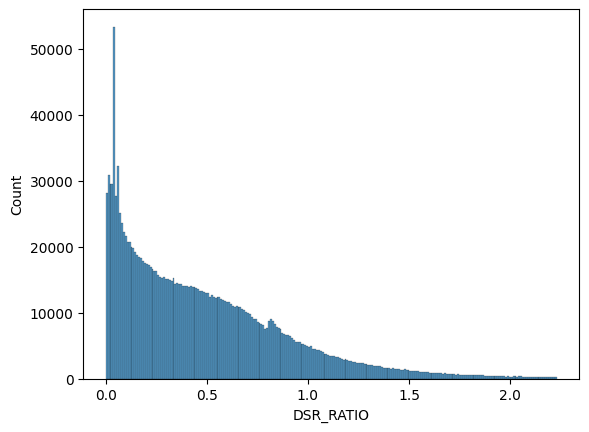

In [25]:
#plot distribution
sns.histplot(data = df[(df.DSR_RATIO <= 2.23) &
             (df.TOTAL_DSR > 0)]  , x='DSR_RATIO')
plt.show()

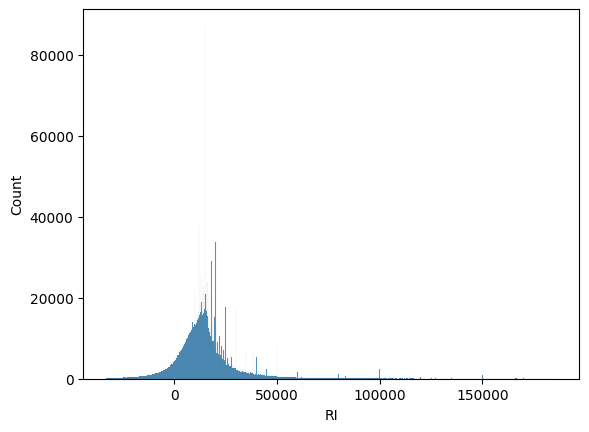

In [26]:
#plot distribution
sns.histplot(data = df[(df.RI <= 186192.84) &
             (df.RI > -33405.93)]  , x='RI')
plt.show()

In [27]:
df[['RI']].describe(pent_up).to_clipboard(excel=True)
df[['RI']].describe(pent_up)

RI
count     2,207,162.00
mean         25,208.84
std       2,441,709.03
min    -194,313,216.00
1%          -33,405.93
5%           -6,309.95
10%             545.29
25%           8,000.00
50%          14,309.00
75%          20,040.00
90%          34,100.00
95%          50,000.00
99%         186,192.84
max   2,212,030,516.25

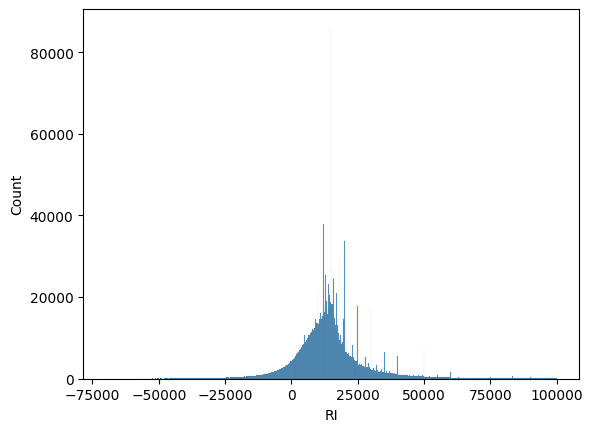

In [28]:
# distribution of c3_df
sns.histplot(data=df[(df.RI < 100000) & (df.RI > -70000) & (df.DSR_RATIO < 4)], x='RI')
plt.show()

In [29]:
# Filter NO DSR out AND กลุ่มลูกค้าที่ส่งเฉพาะ นส รับรองเงินเดือน AND DSR >50 percentile
df[(df.TOTAL_DSR > 0) &
        (df.cust_type_desc.isin([ 'L - หนังสือรับรองเงินเดือน']))]\
        .groupby(['INCOME_RANGE'])[['RI', 'DSR_RATIO']].describe(pent_up).T

INCOME_RANGE        15-30k         30k       <15k
RI        count   5,379.00    1,548.00     975.00
          mean    9,623.51   24,196.02   6,463.99
          std     9,419.60   60,152.26   7,579.62
          min   -88,622.52 -188,449.17 -98,589.90
          1%    -24,014.75  -75,743.30 -18,504.93
          5%     -5,932.33  -23,949.80  -3,969.00
          10%      -371.00  -10,549.09    -110.22
          25%     5,926.55    5,812.20   4,288.84
          50%    11,738.30   21,112.72   8,189.00
          75%    14,834.51   33,457.20  10,725.93
          90%    17,991.20   49,437.95  12,119.50
          95%    20,548.35   70,413.97  12,981.35
          99%    24,736.60  191,656.90  13,659.91
          max    29,690.00  999,286.80  14,560.00
DSR_RATIO count   5,379.00    1,548.00     975.00
          mean        0.47        0.59       0.48
          std         0.49        0.52       0.59
          min         0.00        0.00       0.00
          1%          0.01        0.01       0.01
          5%          0.02        0.02       0.03
          10%         0.04        0.06       0.05
          25%         0.11        0.20       0.13
          50%         0.34        0.47       0.32
          75%         0.66        0.86       0.66
          90%         1.02        1.27       1.01
          95%         1.32        1.59       1.31
          99%         2.29        2.49       2.62
          max         5.93        3.17       8.04

In [30]:
print(f"Percentile of 2000 RI = { percentileofscore(df[(df.TOTAL_DSR > 0) &(df.cust_type_desc.isin(['L - หนังสือรับรองเงินเดือน']))][df.INCOME_RANGE == '<15k']['RI'], 2000)}%")
print(f"Percentile of 3000 RI = { percentileofscore(df[(df.TOTAL_DSR > 0) &(df.cust_type_desc.isin([ 'L - หนังสือรับรองเงินเดือน']))][df.INCOME_RANGE == '15-30k']['RI'], 3000)}%")
print(f"Percentile of 5000 RI = { percentileofscore(df[(df.TOTAL_DSR > 0) &(df.cust_type_desc.isin([ 'L - หนังสือรับรองเงินเดือน']))][df.INCOME_RANGE == '30k']['RI'], 5000)}%")

Percentile of 2000 RI = 16.51282051282051%
Percentile of 3000 RI = 16.21119167131437%
Percentile of 5000 RI = 24.09560723514212%


### 2.2 OCCUPATION in ANALYSIS

In [31]:
# DSR by occpation
df.groupby('CLEAN_OCCUPATION_DESC')[['APPLY_NO','RI','DSR_RATIO', 'FINAL_INCOME']].agg({'APPLY_NO':'count'
                                                         ,'DSR_RATIO':np.median
                                                            , 'RI':np.median
                                                                                        ,'FINAL_INCOME':np.median
                                                          }).sort_values(['APPLY_NO', 'DSR_RATIO'], ascending=False)

APPLY_NO  DSR_RATIO        RI  FINAL_INCOME
CLEAN_OCCUPATION_DESC                                                                
พนักงานบริษัท/พนักงานประจำ/ลูกจ้างประจำ     983455       0.21 14,786.75     20,000.00
ข้าราชการ                                   772841       0.35 12,387.00     19,410.00
เจ้าของกิจการ-ทะเบียนการค้า                  67835       0.25 19,037.40     31,379.00
พนักงานขาย (ขายตรง / ขายประกัน / ฯลฯ)        50206       0.15 15,000.00     20,000.00
พ่อค้า / แม่ค้า                              39591       0.03 20,000.00     25,000.00
...                                            ...        ...       ...           ...
สมุห์บัญชี                                       8       0.95  1,428.26     24,770.00
เจ้าของกิจการนายหน้ารับ-ส่งคนไปทำงาน ตปท         7       0.21 33,844.00     54,954.00
นักการทูต                                        6       0.00 22,700.00     22,700.00
เจ้าของกิจการค้าอาวุธ                            4       0.61 64,845.70    108,982.50
ผู้คุมเรือนจำ                                    4       0.00 30,003.00     30,003.00

[76 rows x 4 columns]

In [32]:
# DSR by occpation
df[(df.TOTAL_DSR > 0)
    ].groupby('CLEAN_OCCUPATION_DESC')[['APPLY_NO','RI','DSR_RATIO', 'FINAL_INCOME']].agg({'APPLY_NO':'count'
                                                                                             ,'FINAL_INCOME':np.median
                                                                                           ,'DSR_RATIO':np.median
                                                            , 'RI':np.median
                                                          }).sort_values(['APPLY_NO', 'DSR_RATIO'], ascending=False)

APPLY_NO  FINAL_INCOME  DSR_RATIO        RI
CLEAN_OCCUPATION_DESC                                                                
พนักงานบริษัท/พนักงานประจำ/ลูกจ้างประจำ     752652     20,640.00       0.34 13,072.83
ข้าราชการ                                   617246     20,060.00       0.51 10,011.00
เจ้าของกิจการ-ทะเบียนการค้า                  51361     32,275.00       0.48 13,243.80
พนักงานขาย (ขายตรง / ขายประกัน / ฯลฯ)        35180     20,000.00       0.33 13,020.00
เจ้าของกิจการ-นิติบุคคล                      27889     50,000.00       0.50 16,855.00
...                                            ...           ...        ...       ...
นักสืบ                                          12     18,490.00       0.05 16,001.70
สมุห์บัญชี                                       8     24,770.00       0.95  1,428.26
หมอนวด                                           5     18,520.00       0.06 16,970.00
เจ้าของกิจการนายหน้ารับ-ส่งคนไปทำงาน ตปท         4     63,896.00       0.60 38,674.90
เจ้าของกิจการค้าอาวุธ                            3     84,027.00       1.05 -4,246.60

[74 rows x 4 columns]

#### Criteria test

In [33]:
c1_df = df[(df.TOTAL_DSR > 0) &
        (df.cust_type_desc.isin([ 'L - หนังสือรับรองเงินเดือน'])) &
        (df.DSR_RATIO >= 0.32)]

In [34]:
# Filter NO DSR out AND กลุ่มลูกค้าที่ส่งเฉพาะ นส รับรองเงินเดือน AND DSR-ratio >50 percentile
c1_df.groupby(['INCOME_RANGE'])[['RI', 'DSR_RATIO']].describe(pent_up).T

INCOME_RANGE        15-30k         30k       <15k
RI        count   2,786.00      977.00     487.00
          mean    3,965.62    8,876.73   2,287.78
          std     9,693.11   46,162.27   8,795.47
          min   -88,622.52 -188,449.17 -98,589.90
          1%    -32,357.92  -88,289.90 -23,950.21
          5%    -13,785.00  -37,787.58  -7,747.04
          10%    -5,671.95  -20,129.00  -3,977.66
          25%     1,755.10   -2,867.52     960.33
          50%     6,160.00   10,746.00   4,248.68
          75%     9,416.52   19,709.00   6,332.70
          90%    11,823.65   28,862.78   7,893.50
          95%    13,628.64   37,668.24   8,408.00
          99%    16,629.21   84,465.17   8,942.81
          max    20,142.12  706,035.90   9,620.00
DSR_RATIO count   2,786.00      977.00     487.00
          mean        0.78        0.86       0.82
          std         0.51        0.49       0.68
          min         0.32        0.32       0.32
          1%          0.32        0.33       0.32
          5%          0.35        0.35       0.35
          10%         0.38        0.38       0.38
          25%         0.47        0.51       0.49
          50%         0.65        0.71       0.66
          75%         0.91        1.07       0.92
          90%         1.31        1.52       1.31
          95%         1.66        1.81       1.61
          99%         2.60        2.57       3.00
          max         5.93        3.17       8.04

In [35]:
print(f"Percentile of 2000 RI = { percentileofscore(c1_df[c1_df.INCOME_RANGE == '<15k']['RI'], 2000)}%")
print(f"Percentile of 3000 RI = { percentileofscore(c1_df[c1_df.INCOME_RANGE == '15-30k']['RI'], 3000)}%")
print(f"Percentile of 5000 RI = { percentileofscore(c1_df[c1_df.INCOME_RANGE == '30k']['RI'], 5000)}%")

Percentile of 2000 RI = 33.05954825462012%
Percentile of 3000 RI = 31.29935391241924%
Percentile of 5000 RI = 38.17809621289663%


In [36]:
# ลองตัด criteria นส รับรองเงินเดือนออก
c2_df = df[(df.TOTAL_DSR > 0) &
        (df.DSR_RATIO >= 0.32)]

In [37]:
# Filter NO DSR out AND กลุ่มลูกค้าที่ส่งเฉพาะ นส รับรองเงินเดือน AND DSR-ratio >50 percentile
c2_df.groupby(['INCOME_RANGE'])[['RI', 'DSR_RATIO']].describe(pent_up).T

INCOME_RANGE           15-30k           30k          <15k
RI        count    551,907.00    295,469.00    106,345.00
          mean       4,335.24      9,662.41       -190.78
          std       17,925.52     50,648.00     17,871.17
          min   -4,352,274.40 -9,932,395.67 -1,551,738.00
          1%       -37,532.00    -89,566.04    -57,181.54
          5%       -11,351.45    -30,106.68    -18,769.72
          10%       -4,955.48    -15,503.35     -9,251.60
          25%        2,039.55        430.20     -1,243.30
          50%        6,798.00     12,249.10      3,332.00
          75%       10,067.70     21,353.00      6,229.11
          90%       12,861.17     32,225.95      7,829.73
          95%       14,654.00     44,069.92      8,485.93
          99%       17,469.35     94,922.00      9,399.16
          max      169,755.17  1,086,642.60     98,699.22
DSR_RATIO count    551,907.00    295,469.00    106,345.00
          mean           0.79          0.83           inf
          std            0.89          0.89           NaN
          min            0.32          0.32          0.32
          1%             0.33          0.33          0.33
          5%             0.35          0.35          0.35
          10%            0.38          0.39          0.38
          25%            0.47          0.49          0.49
          50%            0.64          0.71          0.72
          75%            0.90          0.99          1.11
          90%            1.25          1.35          1.96
          95%            1.56          1.65          3.19
          99%            2.92          2.64          8.79
          max          153.60        217.58           inf

In [38]:
print(f"Percentile of 2000 RI = { percentileofscore(c2_df[c2_df.INCOME_RANGE == '<15k']['RI'], 2000)}%")
print(f"Percentile of 3000 RI = { percentileofscore(c2_df[c2_df.INCOME_RANGE == '15-30k']['RI'], 3000)}%")
print(f"Percentile of 5000 RI = { percentileofscore(c2_df[c2_df.INCOME_RANGE == '30k']['RI'], 5000)}%")

Percentile of 2000 RI = 40.76308242042409%
Percentile of 3000 RI = 28.98178497464247%
Percentile of 5000 RI = 33.085196754989525%


In [39]:
c2_df.RI.describe(pent_up)

count      953,721.00
mean         5,480.96
std         32,031.89
min     -9,932,395.67
1%         -57,946.30
5%         -17,775.75
10%         -8,008.00
25%          1,217.32
50%          6,902.67
75%         11,591.35
90%         18,905.41
95%         26,151.00
99%         54,069.72
max      1,086,642.60
Name: RI, dtype: float64

In [40]:
c2_df.groupby('CLEAN_OCCUPATION_DESC')[['APPLY_NO','RI','DSR_RATIO']].agg({'APPLY_NO':'count'
                                                         ,'DSR_RATIO':np.median
                                                            , 'RI':np.median
                                                          }).sort_values(['APPLY_NO', 'DSR_RATIO'], ascending=False)

APPLY_NO  DSR_RATIO        RI
CLEAN_OCCUPATION_DESC                                                  
ข้าราชการ                                   401206       0.73  5,804.27
พนักงานบริษัท/พนักงานประจำ/ลูกจ้างประจำ     396528       0.61  8,136.34
เจ้าของกิจการ-ทะเบียนการค้า                  30916       0.94  1,157.66
พนักงานขาย (ขายตรง / ขายประกัน / ฯลฯ)        17834       0.65  6,863.05
เจ้าของกิจการ-นิติบุคคล                      16716       0.99    275.10
...                                            ...        ...       ...
สมุห์บัญชี                                       6       0.99    182.96
เจ้าของกิจการนายหน้ารับ-ส่งคนไปทำงาน ตปท         3       0.67 33,844.00
เจ้าของกิจการค้าอาวุธ                            2       1.09 -7,245.55
นักสืบ                                           2       0.72  4,805.03
หมอนวด                                           1       0.78  2,417.92

[74 rows x 3 columns]

# 3. Final Story Telling

In [41]:
# create flag มีหนี้หรือเปล่า by TOTAL_DSR >0
def _flg_dsr(x):
    if x <= 0:
        return "N"
    else:
        return "Y"
df['TOTAL_DSR_FLG'] = df.TOTAL_DSR.apply(_flg_dsr)
df['HIGH_DEBT_FLG'] = df.DSR_RATIO.apply(lambda x: "Y" if x >= 0.4 else "N")

In [42]:
print( df.TOTAL_DSR_FLG.value_counts().sum() )
print( df.TOTAL_DSR_FLG.value_counts() )
print(df.TOTAL_DSR_FLG.value_counts(normalize=True)*100 )

2207162
TOTAL_DSR_FLG
Y    1674242
N     532920
Name: count, dtype: int64
TOTAL_DSR_FLG
Y   75.85
N   24.15
Name: proportion, dtype: float64


In [43]:
df[(df.TOTAL_DSR > 0)].DSR_RATIO.describe(pent_up)

count   1,674,242.00
mean             inf
std              NaN
min             0.00
1%              0.01
5%              0.03
10%             0.05
25%             0.15
50%             0.40
75%             0.72
90%             1.09
95%             1.40
99%             2.65
max              inf
Name: DSR_RATIO, dtype: float64

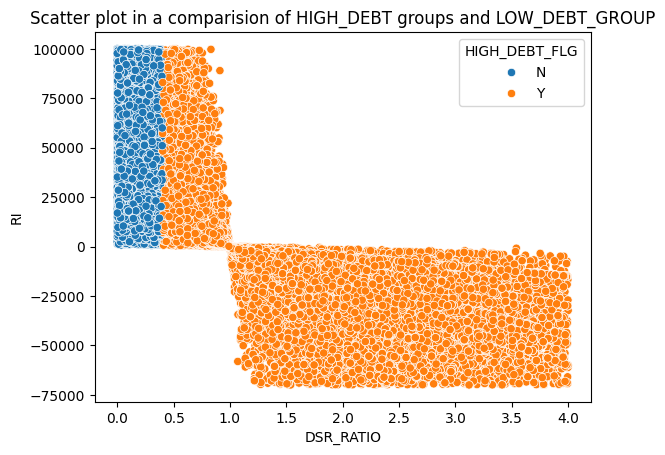

In [44]:
# scatter plot compare starting from GROUP who has DEBT
sns.scatterplot(data=df[(df.TOTAL_DSR > 0) & (df.RI < 100000) & (df.RI > -70000) & (df.DSR_RATIO < 4)
                ], x='DSR_RATIO', y="RI", hue="HIGH_DEBT_FLG")
plt.title(f'Scatter plot in a comparision of HIGH_DEBT groups and LOW_DEBT_GROUP')
plt.show()

### TRIM

In [45]:
# พวกมีหนี้ แต่ มีหนี้น้อยกว่า median
c3_df = df[(df.TOTAL_DSR > 0) &
        (df.DSR_RATIO >= 0.4183)]
c3_df.head(2)
c3_df.FINAL_INCOME.fillna(208300, inplace=True)

# trim irregular values
c3_df = c3_df[(c3_df.RI < 100000) & (c3_df.RI > -70000) & (c3_df.DSR_RATIO < 4)]
# c3_df.to_csv('./outputs/filtered_cust.csv', sep=',', index=False)
print(c3_df.shape[0])

791920


In [46]:
c3_df[['RI','DSR_RATIO']].describe(pent_up)

RI  DSR_RATIO
count 791,920.00 791,920.00
mean    4,402.09       0.85
std    12,892.44       0.44
min   -69,997.35       0.42
1%    -39,833.60       0.42
5%    -16,917.23       0.45
10%    -8,696.91       0.47
25%        76.99       0.56
50%     5,591.83       0.73
75%     9,669.14       1.00
90%    15,629.00       1.36
95%    21,325.51       1.66
99%    40,205.04       2.61
max    99,962.17       4.00

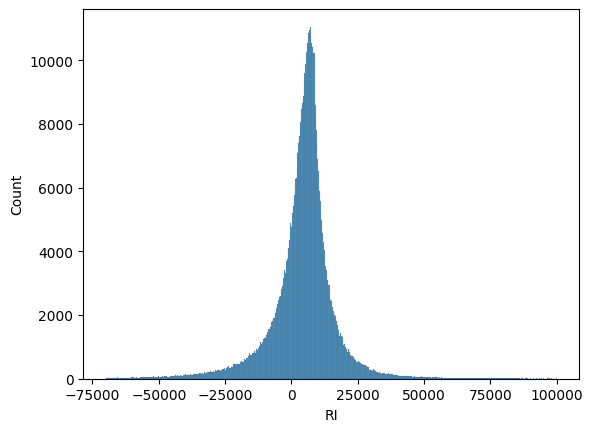

In [47]:
# distribution of c3_df
sns.histplot(data=c3_df[(c3_df.RI < 100000) & (c3_df.RI > -70000) & (c3_df.DSR_RATIO < 4)], x='RI')
plt.show()

In [48]:
print(f"Percentile of 2000 RI = { percentileofscore(c3_df[c3_df.INCOME_RANGE == '<15k']['RI'], 2000)}%")
print(f"Percentile of 3000 RI = { percentileofscore(c3_df[c3_df.INCOME_RANGE == '15-30k']['RI'], 3000)}%")
print(f"Percentile of 5000 RI = { percentileofscore(c3_df[c3_df.INCOME_RANGE == '30k']['RI'], 5000)}%")

Percentile of 2000 RI = 45.48925876864597%
Percentile of 3000 RI = 34.2436470978094%
Percentile of 5000 RI = 37.8798946501256%


In [49]:
print( c3_df.HIGH_DEBT_FLG.value_counts().sum() )
print( c3_df.HIGH_DEBT_FLG.value_counts() )
print( c3_df.HIGH_DEBT_FLG.value_counts(normalize=True)*100 )

791920
HIGH_DEBT_FLG
Y    791920
Name: count, dtype: int64
HIGH_DEBT_FLG
Y   100.00
Name: proportion, dtype: float64


In [50]:
# Filter NO DSR out AND กลุ่มลูกค้าที่ส่งเฉพาะ นส รับรองเงินเดือน AND DSR-ratio >50 percentile of top5 occupa
c3_df.groupby(['INCOME_RANGE'])[['RI']].describe(pent_up).T.to_clipboard(excel=True)
c3_df.groupby(['INCOME_RANGE'])[['RI']].describe(pent_up).T

INCOME_RANGE     15-30k        30k       <15k
RI count     458,688.00 246,417.00  86,815.00
   mean        3,502.53   7,380.72     700.30
   std         8,475.99  19,216.88   6,728.22
   min       -69,962.00 -69,997.35 -60,545.60
   1%        -30,679.34 -52,184.10 -24,995.30
   5%        -12,037.37 -27,225.32 -12,837.64
   10%        -6,021.96 -15,809.42  -7,640.00
   25%           927.46  -1,370.80  -1,532.51
   50%         5,569.42   9,492.00   2,531.90
   75%         8,553.09  17,515.70   5,209.13
   90%        10,935.01  25,857.40   6,672.40
   95%        12,460.00  33,900.70   7,236.13
   99%        14,930.35  60,068.22   8,027.26
   max        25,255.57  99,962.17  47,281.00

In [51]:
# Filter NO DSR out AND กลุ่มลูกค้าที่ส่งเฉพาะ นส รับรองเงินเดือน AND DSR-ratio >50 percentile of top5 occupa
c3_df.groupby(['INCOME_RANGE'])[['FINAL_INCOME']].describe(pent_up).T

INCOME_RANGE           15-30k          30k      <15k
FINAL_INCOME count 458,688.00   246,417.00 86,815.00
             mean   20,237.92    49,136.86 11,918.21
             std     4,204.24    29,155.80  2,472.03
             min    15,000.00    30,000.00      0.00
             1%     15,000.00    30,000.00  3,924.94
             5%     15,000.00    30,220.00  6,301.40
             10%    15,060.00    31,170.00  8,937.00
             25%    16,558.00    34,110.00 10,729.00
             50%    19,510.00    40,490.00 12,543.00
             75%    23,316.25    52,660.00 13,500.00
             90%    26,815.00    73,262.00 14,310.00
             95%    28,235.00    96,448.60 14,600.00
             99%    29,650.00   166,666.67 14,900.00
             max    29,999.00 2,184,652.00 14,999.00

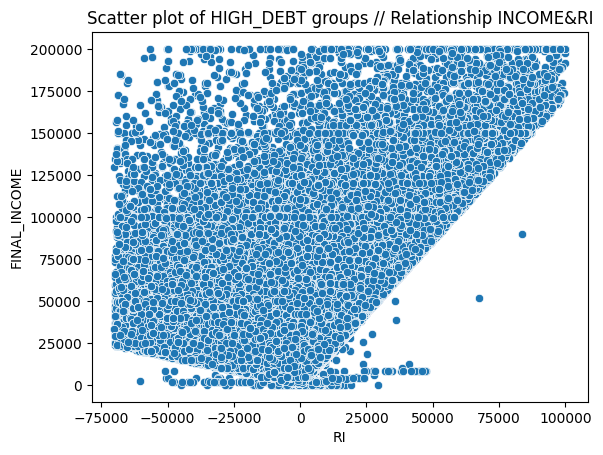

In [52]:
# scatter plot compare starting from GROUP who has DEBT
sns.scatterplot(data=c3_df[(c3_df.FINAL_INCOME <= 200000)
                ], y='FINAL_INCOME', x="RI")
plt.title(f'Scatter plot of HIGH_DEBT groups // Relationship INCOME&RI')
plt.show()

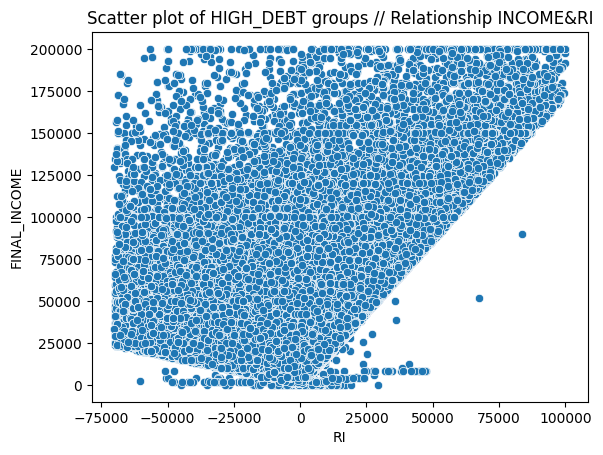

In [53]:
# scatter plot compare starting from GROUP who has DEBT
sns.scatterplot(data=c3_df[(c3_df.FINAL_INCOME <= 200000)
                ], y='FINAL_INCOME', x="RI")
plt.title(f'Scatter plot of HIGH_DEBT groups // Relationship INCOME&RI')
plt.show()

## Create FLG INCOME following a benchmark

In [54]:
c3_df['INCOME_RANGE2']= c3_df.FINAL_INCOME.apply(lambda x : "Y" if x >= 15000 else "N")
# Filter NO DSR out AND กลุ่มลูกค้าที่ส่งเฉพาะ นส รับรองเงินเดือน AND DSR-ratio >50 percentile of top5 occupa
c3_df.groupby(['INCOME_RANGE2'])[['RI']].describe(pent_up).T.to_clipboard(excel=True)
c3_df.groupby(['INCOME_RANGE2'])[['RI']].describe(pent_up).T

INCOME_RANGE2          N          Y
RI count       86,815.00 705,105.00
   mean           700.30   4,857.86
   std          6,728.22  13,386.99
   min        -60,545.60 -69,997.35
   1%         -24,995.30 -41,326.92
   5%         -12,837.64 -17,577.69
   10%         -7,640.00  -8,889.90
   25%         -1,532.51     424.00
   50%          2,531.90   6,211.65
   75%          5,209.13  10,325.00
   90%          6,672.40  16,495.90
   95%          7,236.13  22,355.25
   99%          8,027.26  42,162.81
   max         47,281.00  99,962.17

In [55]:
print(f"Percentile of 2000 RI = { percentileofscore(c3_df[c3_df.INCOME_RANGE2 == 'N']['RI'], 2000)}%")
print(f"Percentile of 3000 RI = { percentileofscore(c3_df[c3_df.INCOME_RANGE2 == 'Y']['RI'], 3000)}%")
print(f"Percentile of 5000 RI = { percentileofscore(c3_df[c3_df.INCOME_RANGE2 == 'Y']['RI'], 5000)}%")
# print(f"Percentile of 5000 RI = { percentileofscore(c3_df[c3_df.INCOME_RANGE2 == '30k']['RI'], 5000)}%")

Percentile of 2000 RI = 45.48925876864597%
Percentile of 3000 RI = 33.88452783627971%
Percentile of 5000 RI = 43.247459598215876%


### Vary number of XX

In [56]:
percent_lst = [i/100 for i in range(35,51)]
# print("GROUP INCOME RANGE  < 15000 THB")
c3_df.groupby('INCOME_RANGE')[['RI']].describe(percent_lst).T.to_clipboard(excel=True)
c3_df.groupby('INCOME_RANGE')[['RI']].describe(percent_lst).T

INCOME_RANGE     15-30k        30k       <15k
RI count     458,688.00 246,417.00  86,815.00
   mean        3,502.53   7,380.72     700.30
   std         8,475.99  19,216.88   6,728.22
   min       -69,962.00 -69,997.35 -60,545.60
   35%         3,142.04   3,810.00     472.26
   36%         3,327.50   4,238.31     639.00
   37%         3,507.27   4,658.31     787.07
   38%         3,682.65   5,040.61     946.37
   39%         3,850.00   5,427.27   1,099.08
   40%         4,025.35   5,811.78   1,252.47
   41%         4,190.54   6,163.57   1,398.53
   42%         4,355.10   6,531.00   1,540.20
   43%         4,518.80   6,918.74   1,665.80
   44%         4,676.92   7,296.40   1,805.33
   45%         4,831.13   7,664.80   1,929.85
   46%         4,980.85   8,038.94   2,061.20
   47%         5,128.99   8,411.87   2,179.20
   48%         5,278.96   8,776.75   2,300.25
   49%         5,425.88   9,143.00   2,421.19
   50%         5,569.42   9,492.00   2,531.90
   max        25,255.57  99,962.17  47,281.00

In [57]:
print(f"Percentile of 2000 RI = { percentileofscore(c3_df[c3_df.INCOME_RANGE == '<15k']['RI'], 2000)}%")
print(f"Percentile of 3000 RI = { percentileofscore(c3_df[c3_df.INCOME_RANGE == '15-30k']['RI'], 3000)}%")
print(f"Percentile of 5000 RI = { percentileofscore(c3_df[c3_df.INCOME_RANGE == '30k']['RI'], 5000)}%")

Percentile of 2000 RI = 45.48925876864597%
Percentile of 3000 RI = 34.2436470978094%
Percentile of 5000 RI = 37.8798946501256%


In [58]:
percent_lst = [i/100 for i in range(35,51)]
# print("GROUP INCOME RANGE  < 15000 THB")
c3_df.groupby('INCOME_RANGE2')[['RI']].describe(percent_lst).T.to_clipboard(excel=True)
c3_df.groupby('INCOME_RANGE2')[['RI']].describe(percent_lst).T

INCOME_RANGE2          N          Y
RI count       86,815.00 705,105.00
   mean           700.30   4,857.86
   std          6,728.22  13,386.99
   min        -60,545.60 -69,997.35
   35%            472.26   3,266.80
   36%            639.00   3,494.59
   37%            787.07   3,716.00
   38%            946.37   3,928.60
   39%          1,099.08   4,144.10
   40%          1,252.47   4,355.20
   41%          1,398.53   4,564.40
   42%          1,540.20   4,761.85
   43%          1,665.80   4,953.30
   44%          1,805.33   5,142.00
   45%          1,929.85   5,332.76
   46%          2,061.20   5,515.00
   47%          2,179.20   5,702.62
   48%          2,300.25   5,879.00
   49%          2,421.19   6,044.20
   50%          2,531.90   6,211.65
   max         47,281.00  99,962.17

In [59]:
# การแจกจ่ายรายได้ช่วงที่มากกว่า 15k 
print(c3_df[c3_df.INCOME_RANGE2 == "Y"]['INCOME_RANGE'].value_counts().sum())
print(c3_df[c3_df.INCOME_RANGE2 == "Y"]['INCOME_RANGE'].value_counts() )
print(c3_df[c3_df.INCOME_RANGE2 == "Y"]['INCOME_RANGE'].value_counts(normalize=True)*100 )
# .value_counts(normalize=True)*100 

705105
INCOME_RANGE
15-30k    458688
30k       246417
Name: count, dtype: int64
INCOME_RANGE
15-30k   65.05
30k      34.95
Name: proportion, dtype: float64


In [60]:
c3_df.groupby('INCOME_RANGE2')[['RI']].describe(percent_lst).T.to_clipboard(excel=True)
c3_df.groupby('INCOME_RANGE2')[['RI']].describe(percent_lst).T

INCOME_RANGE2          N          Y
RI count       86,815.00 705,105.00
   mean           700.30   4,857.86
   std          6,728.22  13,386.99
   min        -60,545.60 -69,997.35
   35%            472.26   3,266.80
   36%            639.00   3,494.59
   37%            787.07   3,716.00
   38%            946.37   3,928.60
   39%          1,099.08   4,144.10
   40%          1,252.47   4,355.20
   41%          1,398.53   4,564.40
   42%          1,540.20   4,761.85
   43%          1,665.80   4,953.30
   44%          1,805.33   5,142.00
   45%          1,929.85   5,332.76
   46%          2,061.20   5,515.00
   47%          2,179.20   5,702.62
   48%          2,300.25   5,879.00
   49%          2,421.19   6,044.20
   50%          2,531.90   6,211.65
   max         47,281.00  99,962.17

In [61]:
c3_df[['RI']].describe(pent_up).to_clipboard(excel=True)
c3_df[['RI']].describe(pent_up)

RI
count 791,920.00
mean    4,402.09
std    12,892.44
min   -69,997.35
1%    -39,833.60
5%    -16,917.23
10%    -8,696.91
25%        76.99
50%     5,591.83
75%     9,669.14
90%    15,629.00
95%    21,325.51
99%    40,205.04
max    99,962.17

In [62]:
c3_df.columns

Index(['APPLY_NO', 'ID_NUMBER', 'CUST_TYPE_CD', 'APP_FINALIZE_DATE', 'APP_STATUS_REASON', 'ACC_DECISION', 'PRODUCT_ID_DESC', 'DSR', 'OTHER_DSR', 'TOTAL_DSR', 'MONTHLY_INCOME', 'RECENT_INCOME', 'APPLY_AGE', 'ASCORE_GRADE', 'WAIVE_DOC_TYPE', 'LOAN_TYPE_ON_WAIVE', 'OCCUPATION_DESC', 'CLEAN_OCCUPATION_DESC', 'company_desc', 'business_desc', 'FINAL_INCOME', 'RI', 'RI_15k', 'RI_1530k', 'RI_30k', 'INCOME_RANGE', 'RI_BOT', 'DSR_RATIO', 'age_bin', 'cust_type_desc', 'TOTAL_DSR_FLG', 'HIGH_DEBT_FLG', 'INCOME_RANGE2'], dtype='object')

##### Test Approval rate

In [63]:
# approval rate from KTC
c3_df[(c3_df['INCOME_RANGE2'] == "Y") ][['RI_BOT']].value_counts(normalize=True)*100

RI_BOT
Pass     64.49
Fail     35.51
Name: proportion, dtype: float64

In [64]:
# create flag cut by TBA
c3_df['RI_TBA'] = c3_df.apply(lambda rw: "Pass" if ( (rw['INCOME_RANGE2'] == "Y") & (rw['RI'] >=5000) )
                              else ( "Pass" if ( (rw['INCOME_RANGE2'] == "Y") & (rw['RI'] >=2000) )
                                    else "Fail" ), axis =1)

In [65]:
# approval rate from KTC
c3_df[(c3_df['INCOME_RANGE2'] == "Y") ][['RI_TBA']].value_counts(normalize=True)*100

RI_TBA
Pass     70.05
Fail     29.95
Name: proportion, dtype: float64

In [66]:
c3_df.head(2)

APPLY_NO      ID_NUMBER  CUST_TYPE_CD   APP_FINALIZE_DATE APP_STATUS_REASON ACC_DECISION PRODUCT_ID_DESC       DSR  OTHER_DSR  TOTAL_DSR  MONTHLY_INCOME  RECENT_INCOME  APPLY_AGE ASCORE_GRADE WAIVE_DOC_TYPE  LOAN_TYPE_ON_WAIVE                          OCCUPATION_DESC                    CLEAN_OCCUPATION_DESC                           company_desc                         business_desc  FINAL_INCOME       RI RI_15k RI_1530k RI_30k INCOME_RANGE RI_BOT  DSR_RATIO age_bin    cust_type_desc TOTAL_DSR_FLG HIGH_DEBT_FLG INCOME_RANGE2 RI_TBA
1  2111056084  3901200088537          8.00  04JAN2022:10:05:16               D30     Declined              RL 16,770.53     300.00  17,070.53           19250      25,750.00         44           B+            NaN                 NaN  พนักงานบริษัท/พนักงานประจำ/ลูกจ้างประจำ  พนักงานบริษัท/พนักงานประจำ/ลูกจ้างประจำ  เอกชน (บริษัท / หจก. / หน่วยงานเอกชน)    การค้าปลีก / ค้าส่ง/ห้างสรรพสินค้า     19,250.00 2,179.47   Pass     Fail   Pass       15-30k   Fail       0.89   40-49  O - ลูกค้าทั่วไป             Y             Y             Y   Pass
4  2111074233  1101800536973          8.00  14JAN2022:15:22:28               A10     Approved              RL 10,223.34     900.00  11,123.34           19510      19,510.00         29           A+             T4                 NaN                      ครูในเขตต่างจังหวัด                                ข้าราชการ                     รัฐบาล / ข้าราชการ  สถาบันการศึกษา / สถาบันแนะแนวกวดวิชา     19,510.00 8,386.66   Pass     Pass   Pass       15-30k   Pass       0.57   20-29  O - ลูกค้าทั่วไป             Y             Y             Y   Pass

# # หา attribute ที่คล้ายกันระหว่าง income_range >=15k & RI = 5000 AND RI=3000, INCOME 15-30k

In [67]:
c3_df.head(3)

APPLY_NO      ID_NUMBER  CUST_TYPE_CD   APP_FINALIZE_DATE APP_STATUS_REASON ACC_DECISION PRODUCT_ID_DESC       DSR  OTHER_DSR  TOTAL_DSR  MONTHLY_INCOME  RECENT_INCOME  APPLY_AGE ASCORE_GRADE WAIVE_DOC_TYPE  LOAN_TYPE_ON_WAIVE                          OCCUPATION_DESC                    CLEAN_OCCUPATION_DESC                           company_desc                         business_desc  FINAL_INCOME       RI RI_15k RI_1530k RI_30k INCOME_RANGE RI_BOT  DSR_RATIO age_bin    cust_type_desc TOTAL_DSR_FLG HIGH_DEBT_FLG INCOME_RANGE2 RI_TBA
1  2111056084  3901200088537          8.00  04JAN2022:10:05:16               D30     Declined              RL 16,770.53     300.00  17,070.53           19250      25,750.00         44           B+            NaN                 NaN  พนักงานบริษัท/พนักงานประจำ/ลูกจ้างประจำ  พนักงานบริษัท/พนักงานประจำ/ลูกจ้างประจำ  เอกชน (บริษัท / หจก. / หน่วยงานเอกชน)    การค้าปลีก / ค้าส่ง/ห้างสรรพสินค้า     19,250.00 2,179.47   Pass     Fail   Pass       15-30k   Fail       0.89   40-49  O - ลูกค้าทั่วไป             Y             Y             Y   Pass
4  2111074233  1101800536973          8.00  14JAN2022:15:22:28               A10     Approved              RL 10,223.34     900.00  11,123.34           19510      19,510.00         29           A+             T4                 NaN                      ครูในเขตต่างจังหวัด                                ข้าราชการ                     รัฐบาล / ข้าราชการ  สถาบันการศึกษา / สถาบันแนะแนวกวดวิชา     19,510.00 8,386.66   Pass     Pass   Pass       15-30k   Pass       0.57   20-29  O - ลูกค้าทั่วไป             Y             Y             Y   Pass
5  2112004023  1941000081699          8.00  13JAN2022:13:43:46               A10     Approved              RL 11,866.75   1,020.00  12,886.75           17901      18,300.00         35           A+            NaN                 NaN                      ครูในเขตต่างจังหวัด                      ครูในเขตต่างจังหวัด  เอกชน (บริษัท / หจก. / หน่วยงานเอกชน)  สถาบันการศึกษา / สถาบันแนะแนวกวดวิชา     18,300.00 5,014.25   Pass     Pass   Pass       15-30k   Pass       0.72   30-39  O - ลูกค้าทั่วไป             Y             Y             Y   Pass

In [68]:
# TBA pass group
c3_df[(c3_df.INCOME_RANGE2 == "Y")&(c3_df.RI >= 5000) ][['DSR_RATIO']].describe(pent_up)

DSR_RATIO
count 400,186.00
mean        0.59
std         0.12
min         0.42
1%          0.42
5%          0.43
10%         0.45
25%         0.50
50%         0.58
75%         0.68
90%         0.76
95%         0.81
99%         0.88
max         0.98

In [69]:
# KTC pass group
c3_df[(c3_df.INCOME_RANGE == "15-30k")&(c3_df.RI >= 3000) ][['DSR_RATIO']].describe(pent_up)

DSR_RATIO
count 301,626.00
mean        0.61
std         0.12
min         0.42
1%          0.42
5%          0.43
10%         0.45
25%         0.50
50%         0.60
75%         0.70
90%         0.79
95%         0.82
99%         0.86
max         0.94

### FINAL_INCOME Distribution

In [70]:
c3_df[['FINAL_INCOME']].describe(pent_up).to_clipboard(excel=True)
c3_df[['FINAL_INCOME']].describe(pent_up)

FINAL_INCOME
count    791,920.00
mean      28,318.17
std       21,853.64
min            0.00
1%         8,606.00
5%        12,321.95
10%       14,400.00
25%       16,500.00
50%       21,943.00
75%       33,000.00
90%       49,160.00
95%       61,890.00
99%      110,927.54
max    2,184,652.00

In [71]:
c3_df[['FINAL_INCOME']].describe(percent_lst).to_clipboard(excel=True)
c3_df[['FINAL_INCOME']].describe(percent_lst)

FINAL_INCOME
count    791,920.00
mean      28,318.17
std       21,853.64
min            0.00
35%       18,370.00
36%       18,585.00
37%       18,820.00
38%       19,000.00
39%       19,290.00
40%       19,540.00
41%       19,820.00
42%       20,000.00
43%       20,000.00
44%       20,180.00
45%       20,460.00
46%       20,713.00
47%       21,000.00
48%       21,250.00
49%       21,580.00
50%       21,943.00
max    2,184,652.00

In [72]:
np.percentile(c3_df.FINAL_INCOME, 70)

30000.0

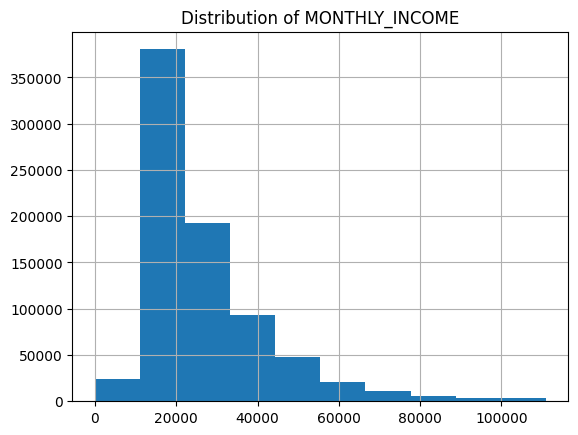

In [73]:
c3_df[c3_df.FINAL_INCOME <=  110900]['FINAL_INCOME'].hist()
plt.title("Distribution of MONTHLY_INCOME")
plt.show()

In [74]:
# พวกที่มี หนี้น้อย (Inverse)
c4_df = df[(df.TOTAL_DSR > 0) &
        (df.DSR_RATIO < 0.4183)]

In [75]:
c4_df.groupby('CLEAN_OCCUPATION_DESC')[['APPLY_NO','RI','DSR_RATIO','FINAL_INCOME']].agg({'APPLY_NO':'count'
                                                        , 'FINAL_INCOME':np.median
                                                         ,'DSR_RATIO':np.median
                                                            , 'RI':np.median
                                                          }).sort_values(['APPLY_NO', 'DSR_RATIO'], ascending=False)

APPLY_NO  FINAL_INCOME  DSR_RATIO         RI
CLEAN_OCCUPATION_DESC                                                                 
พนักงานบริษัท/พนักงานประจำ/ลูกจ้างประจำ     432625     20,000.00       0.17  16,500.00
ข้าราชการ                                   264312     18,000.00       0.15  15,111.33
เจ้าของกิจการ-ทะเบียนการค้า                  23843     50,000.00       0.14  40,205.67
พนักงานขาย (ขายตรง / ขายประกัน / ฯลฯ)        20564     21,000.00       0.15  17,645.17
วิศวกร                                       15542     26,960.00       0.14  22,526.85
...                                            ...           ...        ...        ...
นักการเมือง                                      8     21,500.00       0.12  16,566.33
หมอนวด                                           4     18,520.00       0.05  17,339.47
สมุห์บัญชี                                       2     20,000.00       0.18  16,399.40
เจ้าของกิจการนายหน้ารับ-ส่งคนไปทำงาน ตปท         1     54,954.00       0.21  43,505.80
เจ้าของกิจการค้าอาวุธ                            1    609,048.33       0.17 503,574.80

[74 rows x 4 columns]

### ลองวิเคราะห์กลุ่มที่มีหนี้น้อย เพื่อดู RI

In [76]:
# ลองวิเคราะห์กลุ่มที่มีหนี้น้อย เพื่อดู RI
c4_df.groupby(['INCOME_RANGE'])[['FINAL_INCOME','RI']].describe(pent_up).T

INCOME_RANGE           15-30k              30k       <15k
FINAL_INCOME count 529,685.00       232,657.00 107,645.00
             mean   19,414.96       103,483.56  12,361.41
             std     3,993.48     4,642,842.42   2,024.13
             min    15,000.00        30,000.00       0.00
             1%     15,000.00        30,000.00   4,249.08
             5%     15,000.00        30,000.00   9,000.00
             10%    15,000.00        30,990.00  10,000.00
             25%    16,000.00        35,000.00  12,000.00
             50%    18,270.00        45,294.00  12,818.00
             75%    22,000.00        71,095.00  13,615.00
             90%    25,524.00       150,000.00  14,379.00
             95%    27,530.00       253,853.10  14,590.00
             99%    29,350.00       770,360.97  14,905.00
             max    29,999.00 2,212,041,113.00  14,999.00
RI           count 529,685.00       232,660.00 107,645.00
             mean   15,994.25        90,335.55  10,611.50
             std     4,372.40     4,632,790.70   5,097.78
             min     5,189.00         7,441.80     677.33
             1%      9,323.42        18,614.00   4,575.11
             5%     10,472.00        21,241.70   6,911.00
             10%    11,390.75        23,377.10   7,692.00
             25%    13,232.00        28,263.38   8,940.85
             50%    15,209.30        36,711.30  10,509.24
             75%    18,300.00        58,243.25  11,937.45
             90%    21,531.28       130,850.40  12,985.82
             95%    23,645.40       227,736.07  13,578.20
             99%    26,900.00       700,728.42  14,557.87
             max   495,472.10 2,212,030,516.25 589,141.00

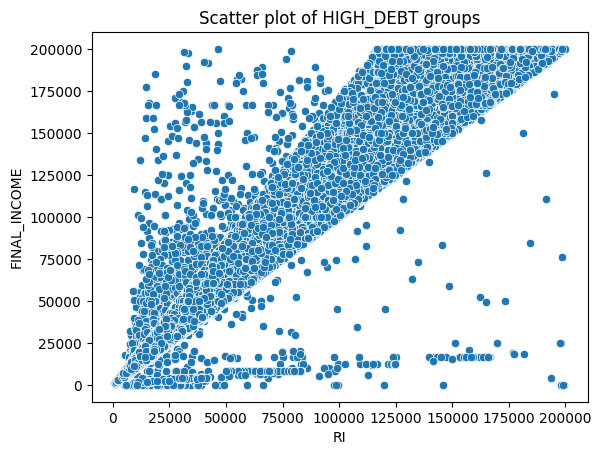

In [77]:
# scatter plot compare starting from GROUP who has DEBT
sns.scatterplot(data=c4_df[(c4_df.TOTAL_DSR > 0) & (c4_df.RI < 200000) & (c4_df.RI >= -40000) & (c4_df.FINAL_INCOME <= 200000)
                ], y='FINAL_INCOME', x="RI")
plt.title(f'Scatter plot of HIGH_DEBT groups')
plt.show()

""" Onyl 16% of customers who have
1. Income_range = 15-30k
2. Has DSR
3. General customers
                has RI <= 3000

around 84% has RI > 3000
"""

### Test group >> the income range 15-30k

In [78]:
c3_df.head(2)

APPLY_NO      ID_NUMBER  CUST_TYPE_CD   APP_FINALIZE_DATE APP_STATUS_REASON ACC_DECISION PRODUCT_ID_DESC       DSR  OTHER_DSR  TOTAL_DSR  MONTHLY_INCOME  RECENT_INCOME  APPLY_AGE ASCORE_GRADE WAIVE_DOC_TYPE  LOAN_TYPE_ON_WAIVE                          OCCUPATION_DESC                    CLEAN_OCCUPATION_DESC                           company_desc                         business_desc  FINAL_INCOME       RI RI_15k RI_1530k RI_30k INCOME_RANGE RI_BOT  DSR_RATIO age_bin    cust_type_desc TOTAL_DSR_FLG HIGH_DEBT_FLG INCOME_RANGE2 RI_TBA
1  2111056084  3901200088537          8.00  04JAN2022:10:05:16               D30     Declined              RL 16,770.53     300.00  17,070.53           19250      25,750.00         44           B+            NaN                 NaN  พนักงานบริษัท/พนักงานประจำ/ลูกจ้างประจำ  พนักงานบริษัท/พนักงานประจำ/ลูกจ้างประจำ  เอกชน (บริษัท / หจก. / หน่วยงานเอกชน)    การค้าปลีก / ค้าส่ง/ห้างสรรพสินค้า     19,250.00 2,179.47   Pass     Fail   Pass       15-30k   Fail       0.89   40-49  O - ลูกค้าทั่วไป             Y             Y             Y   Pass
4  2111074233  1101800536973          8.00  14JAN2022:15:22:28               A10     Approved              RL 10,223.34     900.00  11,123.34           19510      19,510.00         29           A+             T4                 NaN                      ครูในเขตต่างจังหวัด                                ข้าราชการ                     รัฐบาล / ข้าราชการ  สถาบันการศึกษา / สถาบันแนะแนวกวดวิชา     19,510.00 8,386.66   Pass     Pass   Pass       15-30k   Pass       0.57   20-29  O - ลูกค้าทั่วไป             Y             Y             Y   Pass

In [79]:
# filter 15-30k income group
df1530k = c3_df[c3_df['INCOME_RANGE'] == '15-30k']
print(df1530k.shape[0])

458688


In [80]:
# น้อยกว่า 15000
c3_df[c3_df['INCOME_RANGE'] == '<15k'][['FINAL_INCOME', 'TOTAL_DSR', 'RI', 'DSR_RATIO', 'APPLY_AGE']].describe(pent_up)

FINAL_INCOME  TOTAL_DSR         RI  DSR_RATIO  APPLY_AGE
count     86,815.00  86,815.00  86,815.00  86,815.00  86,815.00
mean      11,918.21  11,356.40     700.30       0.99      34.40
std        2,472.03   6,638.61   6,728.22       0.62       8.66
min            0.00     321.28 -60,545.60       0.42      20.00
1%         3,924.94   3,458.29 -24,995.30       0.42      21.00
5%         6,301.40   5,191.90 -12,837.64       0.45      23.00
10%        8,937.00   5,805.70  -7,640.00       0.48      25.00
25%       10,729.00   7,103.28  -1,532.51       0.58      28.00
50%       12,543.00   9,516.00   2,531.90       0.79      33.00
75%       13,500.00  13,373.51   5,209.13       1.14      40.00
90%       14,310.00  19,088.27   6,672.40       1.76      47.00
95%       14,600.00  24,238.56   7,236.13       2.37      51.00
99%       14,900.00  37,336.72   8,027.26       3.49      58.00
max       14,999.00 162,266.70  47,281.00       4.00      85.00

In [81]:
# 15-30k
# DSR-Ratio, FINAL_INCOME, TOTAL_DSR, APPLY_AGE
df1530k[['FINAL_INCOME', 'TOTAL_DSR', 'RI', 'DSR_RATIO', 'APPLY_AGE']].describe(pent_up)

FINAL_INCOME  TOTAL_DSR         RI  DSR_RATIO  APPLY_AGE
count    458,688.00 458,688.00 458,688.00 458,688.00 458,688.00
mean      20,237.92  16,708.75   3,502.53       0.83      34.88
std        4,204.24   9,224.22   8,475.99       0.42       8.24
min       15,000.00   5,051.40 -69,962.00       0.42      20.00
1%        15,000.00   6,778.85 -30,679.34       0.42      23.00
5%        15,000.00   7,730.00 -12,037.37       0.44      24.00
10%       15,060.00   8,559.45  -6,021.96       0.47      26.00
25%       16,558.00  10,633.30     927.46       0.55      28.00
50%       19,510.00  14,137.54   5,569.42       0.71      33.00
75%       23,316.25  19,831.67   8,553.09       0.95      40.00
90%       26,815.00  27,691.03  10,935.01       1.30      46.00
95%       28,235.00  34,284.00  12,460.00       1.59      50.00
99%       29,650.00  52,423.01  14,930.35       2.54      58.00
max       29,999.00 235,499.00  25,255.57       4.00      85.00

In [82]:
# more than 30k 
c3_df[c3_df['INCOME_RANGE'] == '30k'][['FINAL_INCOME', 'TOTAL_DSR', 'RI', 'DSR_RATIO', 'APPLY_AGE']].describe(pent_up)

FINAL_INCOME    TOTAL_DSR         RI  DSR_RATIO  APPLY_AGE
count    246,417.00   246,417.00 246,417.00 246,417.00 246,417.00
mean      49,136.86    41,365.62   7,380.72       0.86      42.00
std       29,155.80    28,386.47  19,216.88       0.38       8.76
min       30,000.00     6,355.00 -69,997.35       0.42      20.00
1%        30,000.00    13,740.00 -52,184.10       0.42      25.00
5%        30,220.00    16,221.73 -27,225.32       0.45      28.00
10%       31,170.00    18,494.60 -15,809.42       0.48      30.00
25%       34,110.00    24,129.20  -1,370.80       0.58      36.00
50%       40,490.00    33,922.00   9,492.00       0.77      42.00
75%       52,660.00    49,260.00  17,515.70       1.03      48.00
90%       73,262.00    71,570.65  25,857.40       1.36      54.00
95%       96,448.60    90,825.74  33,900.70       1.60      57.00
99%      166,666.67   144,633.80  60,068.22       2.14      60.00
max    2,184,652.00 1,273,932.00  99,962.17       3.97      85.00

## Test Approval Rate between TBA, Internal KTC

In [83]:
c3_df.columns

Index(['APPLY_NO', 'ID_NUMBER', 'CUST_TYPE_CD', 'APP_FINALIZE_DATE', 'APP_STATUS_REASON', 'ACC_DECISION', 'PRODUCT_ID_DESC', 'DSR', 'OTHER_DSR', 'TOTAL_DSR', 'MONTHLY_INCOME', 'RECENT_INCOME', 'APPLY_AGE', 'ASCORE_GRADE', 'WAIVE_DOC_TYPE', 'LOAN_TYPE_ON_WAIVE', 'OCCUPATION_DESC', 'CLEAN_OCCUPATION_DESC', 'company_desc', 'business_desc', 'FINAL_INCOME', 'RI', 'RI_15k', 'RI_1530k', 'RI_30k', 'INCOME_RANGE', 'RI_BOT', 'DSR_RATIO', 'age_bin', 'cust_type_desc', 'TOTAL_DSR_FLG', 'HIGH_DEBT_FLG', 'INCOME_RANGE2', 'RI_TBA'], dtype='object')

In [84]:
c3_df.head(3)

APPLY_NO      ID_NUMBER  CUST_TYPE_CD   APP_FINALIZE_DATE APP_STATUS_REASON ACC_DECISION PRODUCT_ID_DESC       DSR  OTHER_DSR  TOTAL_DSR  MONTHLY_INCOME  RECENT_INCOME  APPLY_AGE ASCORE_GRADE WAIVE_DOC_TYPE  LOAN_TYPE_ON_WAIVE                          OCCUPATION_DESC                    CLEAN_OCCUPATION_DESC                           company_desc                         business_desc  FINAL_INCOME       RI RI_15k RI_1530k RI_30k INCOME_RANGE RI_BOT  DSR_RATIO age_bin    cust_type_desc TOTAL_DSR_FLG HIGH_DEBT_FLG INCOME_RANGE2 RI_TBA
1  2111056084  3901200088537          8.00  04JAN2022:10:05:16               D30     Declined              RL 16,770.53     300.00  17,070.53           19250      25,750.00         44           B+            NaN                 NaN  พนักงานบริษัท/พนักงานประจำ/ลูกจ้างประจำ  พนักงานบริษัท/พนักงานประจำ/ลูกจ้างประจำ  เอกชน (บริษัท / หจก. / หน่วยงานเอกชน)    การค้าปลีก / ค้าส่ง/ห้างสรรพสินค้า     19,250.00 2,179.47   Pass     Fail   Pass       15-30k   Fail       0.89   40-49  O - ลูกค้าทั่วไป             Y             Y             Y   Pass
4  2111074233  1101800536973          8.00  14JAN2022:15:22:28               A10     Approved              RL 10,223.34     900.00  11,123.34           19510      19,510.00         29           A+             T4                 NaN                      ครูในเขตต่างจังหวัด                                ข้าราชการ                     รัฐบาล / ข้าราชการ  สถาบันการศึกษา / สถาบันแนะแนวกวดวิชา     19,510.00 8,386.66   Pass     Pass   Pass       15-30k   Pass       0.57   20-29  O - ลูกค้าทั่วไป             Y             Y             Y   Pass
5  2112004023  1941000081699          8.00  13JAN2022:13:43:46               A10     Approved              RL 11,866.75   1,020.00  12,886.75           17901      18,300.00         35           A+            NaN                 NaN                      ครูในเขตต่างจังหวัด                      ครูในเขตต่างจังหวัด  เอกชน (บริษัท / หจก. / หน่วยงานเอกชน)  สถาบันการศึกษา / สถาบันแนะแนวกวดวิชา     18,300.00 5,014.25   Pass     Pass   Pass       15-30k   Pass       0.72   30-39  O - ลูกค้าทั่วไป             Y             Y             Y   Pass

In [85]:
# Create dataframe passed TBA and KTC (BOT)
df_tba = c3_df[(c3_df['RI_TBA']=='Pass')]
print(df_tba.shape[0])
df_ktc = c3_df[(c3_df['RI_BOT']=='Pass')]
print(df_ktc.shape[0])

print('--------')
print(f"KTC Fail: {c3_df[(c3_df['RI_BOT']=='Fail')].shape[0]}")
print(f"TBA Fail: {c3_df[(c3_df['RI_TBA']=='Fail')].shape[0]}")
print(f"Fail Rate Saved by {1-(c3_df[(c3_df['RI_BOT']=='Fail')].shape[0]/c3_df[(c3_df['RI_TBA']=='Fail')].shape[0]) } ")

493917
502033
--------
KTC Fail: 289887
TBA Fail: 298003
Fail Rate Saved by 0.027234625154780367 


In [86]:
c3_df[(c3_df['RI_TBA']=='Fail')].INCOME_RANGE2.value_counts()

INCOME_RANGE2
Y    211188
N     86815
Name: count, dtype: int64

In [87]:
c3_df[(c3_df['RI_BOT']=='Fail')].INCOME_RANGE.value_counts()

INCOME_RANGE
15-30k    157062
30k        93339
<15k       39486
Name: count, dtype: int64

# Define the worst group from c3_df devided by income range from KTC

In [88]:
c3_df

APPLY_NO      ID_NUMBER  CUST_TYPE_CD   APP_FINALIZE_DATE APP_STATUS_REASON ACC_DECISION PRODUCT_ID_DESC       DSR  OTHER_DSR  TOTAL_DSR  MONTHLY_INCOME  RECENT_INCOME  APPLY_AGE ASCORE_GRADE WAIVE_DOC_TYPE  LOAN_TYPE_ON_WAIVE                          OCCUPATION_DESC                    CLEAN_OCCUPATION_DESC                           company_desc                             business_desc  FINAL_INCOME        RI RI_15k RI_1530k RI_30k INCOME_RANGE RI_BOT  DSR_RATIO age_bin    cust_type_desc TOTAL_DSR_FLG HIGH_DEBT_FLG INCOME_RANGE2 RI_TBA
1        2111056084  3901200088537          8.00  04JAN2022:10:05:16               D30     Declined              RL 16,770.53     300.00  17,070.53           19250      25,750.00         44           B+            NaN                 NaN  พนักงานบริษัท/พนักงานประจำ/ลูกจ้างประจำ  พนักงานบริษัท/พนักงานประจำ/ลูกจ้างประจำ  เอกชน (บริษัท / หจก. / หน่วยงานเอกชน)        การค้าปลีก / ค้าส่ง/ห้างสรรพสินค้า     19,250.00  2,179.47   Pass     Fail   Pass       15-30k   Fail       0.89   40-49  O - ลูกค้าทั่วไป             Y             Y             Y   Pass
4        2111074233  1101800536973          8.00  14JAN2022:15:22:28               A10     Approved              RL 10,223.34     900.00  11,123.34           19510      19,510.00         29           A+             T4                 NaN                      ครูในเขตต่างจังหวัด                                ข้าราชการ                     รัฐบาล / ข้าราชการ      สถาบันการศึกษา / สถาบันแนะแนวกวดวิชา     19,510.00  8,386.66   Pass     Pass   Pass       15-30k   Pass       0.57   20-29  O - ลูกค้าทั่วไป             Y             Y             Y   Pass
5        2112004023  1941000081699          8.00  13JAN2022:13:43:46               A10     Approved              RL 11,866.75   1,020.00  12,886.75           17901      18,300.00         35           A+            NaN                 NaN                      ครูในเขตต่างจังหวัด                      ครูในเขตต่างจังหวัด  เอกชน (บริษัท / หจก. / หน่วยงานเอกชน)      สถาบันการศึกษา / สถาบันแนะแนวกวดวิชา     18,300.00  5,014.25   Pass     Pass   Pass       15-30k   Pass       0.72   30-39  O - ลูกค้าทั่วไป             Y             Y             Y   Pass
15       2112012159  3250700094591          8.00  04JAN2022:17:15:17               A10     Approved              CC 15,027.27  13,442.00  28,469.27           34340      34,340.00         45           A+            NaN                 NaN                                    ตำรวจ                                ข้าราชการ                     รัฐบาล / ข้าราชการ   กองทัพบก / เรือ / อากาศ / สำนักงานตำรวจ     34,340.00  5,870.73   Pass     Pass   Pass          30k   Pass       0.83   40-49  O - ลูกค้าทั่วไป             Y             Y             Y   Pass
16       2112012159  3250700094591          8.00  04JAN2022:17:15:17               A10     Approved              RL 15,027.27  13,442.00  28,469.27           34340      34,340.00         45           A+            NaN                 NaN                                    ตำรวจ                                ข้าราชการ                     รัฐบาล / ข้าราชการ   กองทัพบก / เรือ / อากาศ / สำนักงานตำรวจ     34,340.00  5,870.73   Pass     Pass   Pass          30k   Pass       0.83   40-49  O - ลูกค้าทั่วไป             Y             Y             Y   Pass
...             ...            ...           ...                 ...               ...          ...             ...       ...        ...        ...             ...            ...        ...          ...            ...                 ...                                      ...                                      ...                                    ...                                       ...           ...       ...    ...      ...    ...          ...    ...        ...     ...               ...           ...           ...           ...    ...
2207134  2312072451  1101401983208          8.00  30DEC2023:18:55:26               D17     Declined              CC 13,376.65       0

In [89]:
# create occp flg for analyiss
c3_df['occp_analy'] = c3_df.CLEAN_OCCUPATION_DESC.apply(lambda x : 'other' if x not in ['ข้าราชการ', 'พนักงานบริษัท/พนักงานประจำ/ลูกจ้างประจำ', 'ครูในเขตต่างจังหวัด','พนักงานขาย (ขายตรง / ขายประกัน / ฯลฯ)']
                                                       else x
                                                       )
# create a high debt flg
c3_df['HIGH_DEBT_FLG2'] = c3_df.DSR_RATIO.apply(lambda x: "Y" if x >= 0.4 else "N")

# devided the frame by income range
df30k = c3_df[c3_df['INCOME_RANGE'] == '30k']
df1530k = c3_df[c3_df['INCOME_RANGE'] == '15-30k']
df15k = c3_df[c3_df['INCOME_RANGE'] == '<15k']

### 15 - 30 k

In [90]:
# 15000-30000
df1530k[['FINAL_INCOME', 'TOTAL_DSR', 'RI', 'DSR_RATIO', 'APPLY_AGE']].describe(pent_up).to_clipboard(excel=True)
df1530k[['FINAL_INCOME', 'TOTAL_DSR', 'RI', 'DSR_RATIO', 'APPLY_AGE']].describe(pent_up)

FINAL_INCOME  TOTAL_DSR         RI  DSR_RATIO  APPLY_AGE
count    458,688.00 458,688.00 458,688.00 458,688.00 458,688.00
mean      20,237.92  16,708.75   3,502.53       0.83      34.88
std        4,204.24   9,224.22   8,475.99       0.42       8.24
min       15,000.00   5,051.40 -69,962.00       0.42      20.00
1%        15,000.00   6,778.85 -30,679.34       0.42      23.00
5%        15,000.00   7,730.00 -12,037.37       0.44      24.00
10%       15,060.00   8,559.45  -6,021.96       0.47      26.00
25%       16,558.00  10,633.30     927.46       0.55      28.00
50%       19,510.00  14,137.54   5,569.42       0.71      33.00
75%       23,316.25  19,831.67   8,553.09       0.95      40.00
90%       26,815.00  27,691.03  10,935.01       1.30      46.00
95%       28,235.00  34,284.00  12,460.00       1.59      50.00
99%       29,650.00  52,423.01  14,930.35       2.54      58.00
max       29,999.00 235,499.00  25,255.57       4.00      85.00

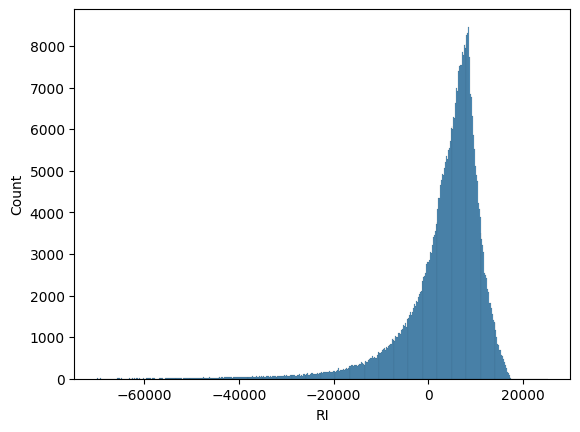

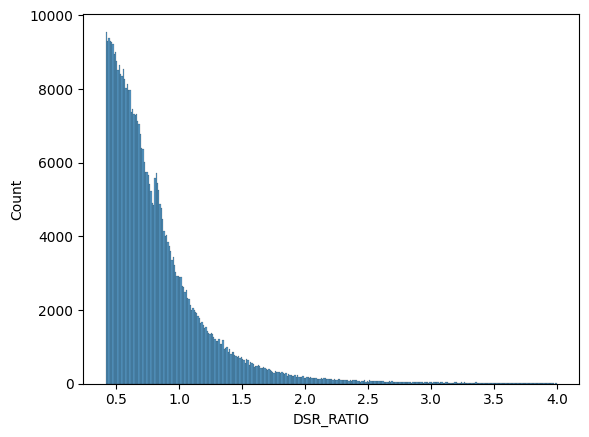

In [91]:
# distribution of c3_df
for val in ['RI', 'DSR_RATIO']:
    sns.histplot(data=df1530k, x=val)
    plt.show()

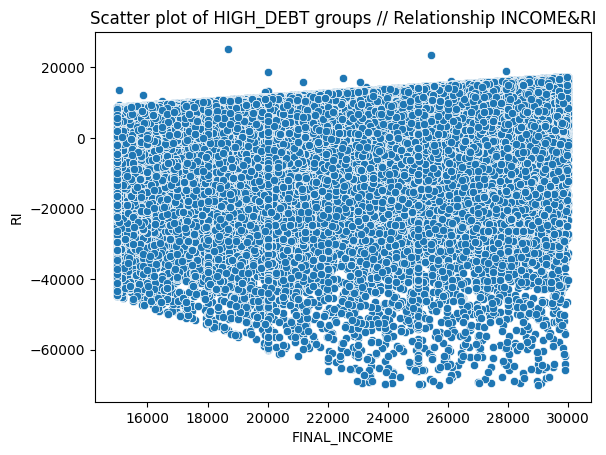

In [93]:
# scatter plot compare starting from GROUP who has DEBT
sns.scatterplot(data=df1530k, x='FINAL_INCOME', y="RI" )
plt.title(f'Scatter plot of HIGH_DEBT groups // Relationship INCOME&RI')
plt.show()

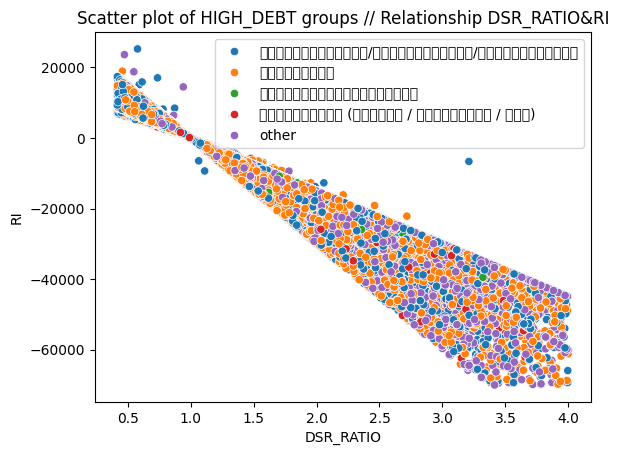

In [94]:
# scatter plot compare starting from GROUP who has DEBT
sns.scatterplot(data=df1530k, x='DSR_RATIO', y="RI", hue = 'occp_analy')
plt.title(f'Scatter plot of HIGH_DEBT groups // Relationship DSR_RATIO&RI')
plt.legend()
plt.show()



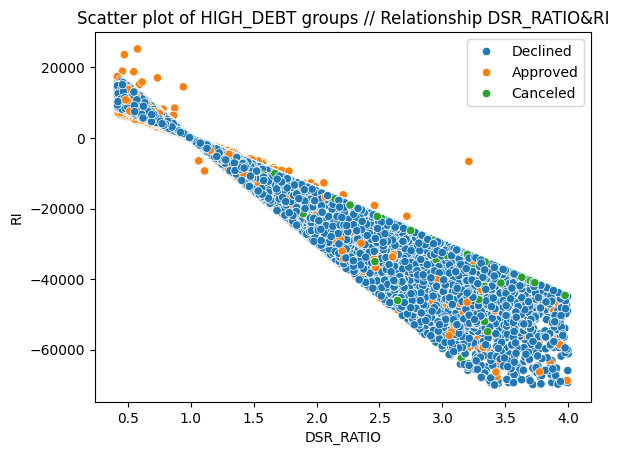

In [95]:
# scatter plot compare starting from GROUP who has DEBT
sns.scatterplot(data=df1530k, x='DSR_RATIO', y="RI", hue = 'ACC_DECISION')
plt.title(f'Scatter plot of HIGH_DEBT groups // Relationship DSR_RATIO&RI')
plt.legend()
plt.show()

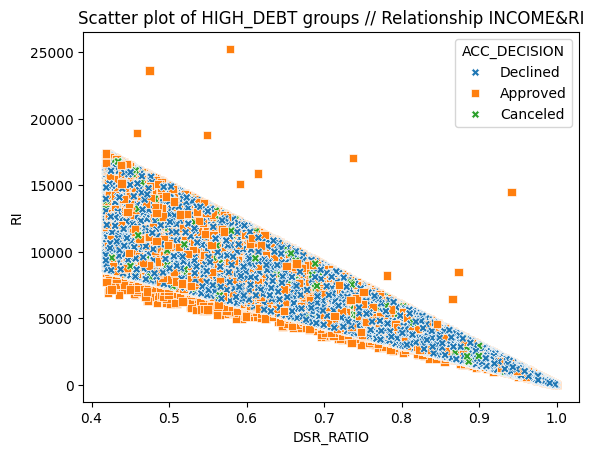

In [96]:
# scatter plot compare starting from GROUP who has DEBT
markers = {"Approved": "s", "Declined": "X", "Canceled":"X"}
sns.scatterplot(data=df1530k[df1530k.DSR_RATIO <=1], x='DSR_RATIO', y="RI", 
                hue = 'ACC_DECISION', style = 'ACC_DECISION', markers=markers
               )
plt.title(f'Scatter plot of HIGH_DEBT groups // Relationship INCOME&RI')
plt.show()

In [97]:
c3_df.head(2)

APPLY_NO      ID_NUMBER  CUST_TYPE_CD   APP_FINALIZE_DATE APP_STATUS_REASON ACC_DECISION PRODUCT_ID_DESC       DSR  OTHER_DSR  TOTAL_DSR  MONTHLY_INCOME  RECENT_INCOME  APPLY_AGE ASCORE_GRADE WAIVE_DOC_TYPE  LOAN_TYPE_ON_WAIVE                          OCCUPATION_DESC                    CLEAN_OCCUPATION_DESC                           company_desc                         business_desc  FINAL_INCOME       RI RI_15k RI_1530k RI_30k INCOME_RANGE RI_BOT  DSR_RATIO age_bin    cust_type_desc TOTAL_DSR_FLG HIGH_DEBT_FLG INCOME_RANGE2 RI_TBA                               occp_analy HIGH_DEBT_FLG2
1  2111056084  3901200088537          8.00  04JAN2022:10:05:16               D30     Declined              RL 16,770.53     300.00  17,070.53           19250      25,750.00         44           B+            NaN                 NaN  พนักงานบริษัท/พนักงานประจำ/ลูกจ้างประจำ  พนักงานบริษัท/พนักงานประจำ/ลูกจ้างประจำ  เอกชน (บริษัท / หจก. / หน่วยงานเอกชน)    การค้าปลีก / ค้าส่ง/ห้างสรรพสินค้า     19,250.00 2,179.47   Pass     Fail   Pass       15-30k   Fail       0.89   40-49  O - ลูกค้าทั่วไป             Y             Y             Y   Pass  พนักงานบริษัท/พนักงานประจำ/ลูกจ้างประจำ              Y
4  2111074233  1101800536973          8.00  14JAN2022:15:22:28               A10     Approved              RL 10,223.34     900.00  11,123.34           19510      19,510.00         29           A+             T4                 NaN                      ครูในเขตต่างจังหวัด                                ข้าราชการ                     รัฐบาล / ข้าราชการ  สถาบันการศึกษา / สถาบันแนะแนวกวดวิชา     19,510.00 8,386.66   Pass     Pass   Pass       15-30k   Pass       0.57   20-29  O - ลูกค้าทั่วไป             Y             Y             Y   Pass                                ข้าราชการ              Y

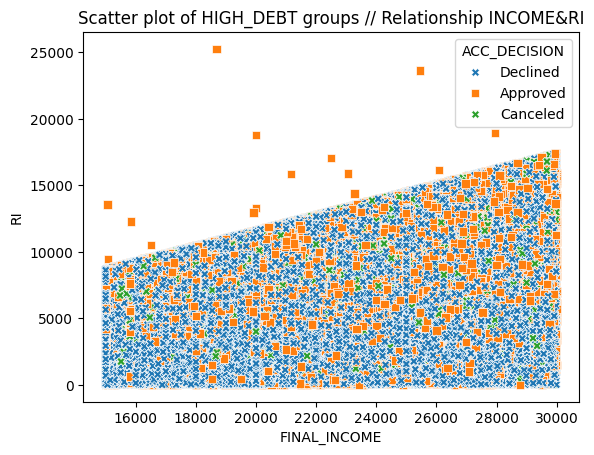

In [98]:
# scatter plot compare starting from GROUP who has DEBT
markers = {"Approved": "s", "Declined": "X", "Canceled":"X"}
sns.scatterplot(data=df1530k[df1530k.DSR_RATIO <=1], x='FINAL_INCOME', y="RI", 
                hue = 'ACC_DECISION', style = 'ACC_DECISION', markers=markers
               )
plt.title(f'Scatter plot of HIGH_DEBT groups // Relationship INCOME&RI')
plt.show()

In [99]:
# create flg DSR_RATIO (High, Med, Low) to define กลุ่มเปาะบาง
# กลุ่มเปาะบาง คือ กลุ่มที่ RI น้อยมากๆหลังชำระหนี้
df1530k['SENS_FLG'] = df1530k['DSR_RATIO'].apply(lambda x : 'not_sensitive' if x <= 0.65 else 'sensitive')
df1530k['SENS_FLG2'] = df1530k['DSR_RATIO'].apply(lambda x : 'not_sensitive' if x <= 0.85 else 'sensitive')
df1530k['SENS_FLG3'] = df1530k['DSR_RATIO'].apply(lambda x : 'not_sensitive' if x <= 0.75 else 'sensitive')

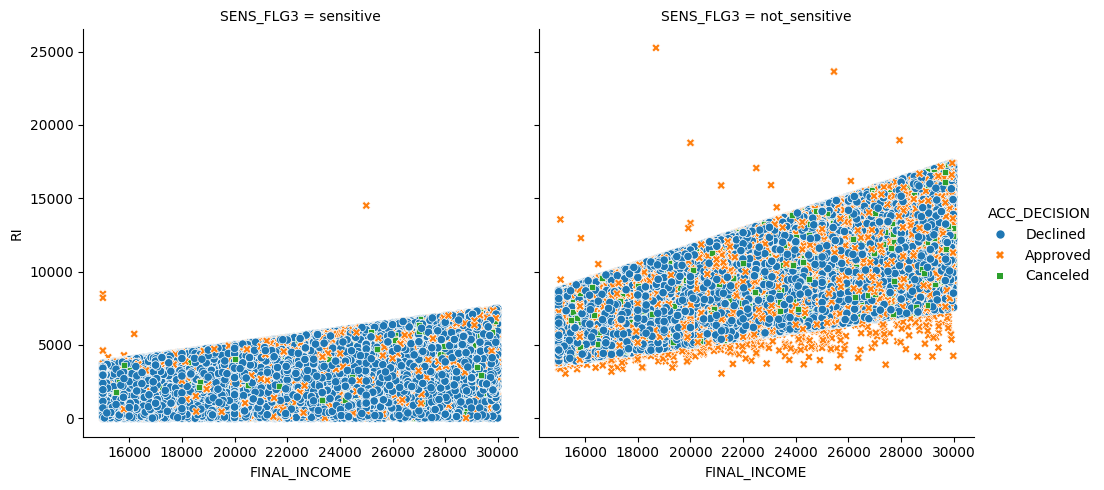

In [100]:
# flg3
sns.relplot(
    data=df1530k[df1530k.DSR_RATIO <=1], x="FINAL_INCOME", y="RI",
    col="SENS_FLG3", hue="ACC_DECISION", style="ACC_DECISION",
    kind="scatter"
)
plt.show()

In [101]:
# summary stat on FLG3
df1530k[(df1530k.DSR_RATIO <=1) & (df1530k.SENS_FLG3 == 'sensitive')][['RI',
                                                                       'FINAL_INCOME',
                                                                       'DSR_RATIO']].describe(pent_up).to_clipboard(excel=True)

df1530k[(df1530k.DSR_RATIO <=1) & (df1530k.SENS_FLG3 == 'sensitive')][['RI',
                                                                       'FINAL_INCOME',
                                                                       'DSR_RATIO']].describe(pent_up)

RI  FINAL_INCOME  DSR_RATIO
count 104,901.00    104,901.00 104,901.00
mean    2,837.51     20,394.17       0.86
std     1,558.00      4,234.57       0.07
min         0.00     15,000.00       0.75
1%         76.70     15,000.00       0.75
5%        367.32     15,000.00       0.76
10%       709.00     15,170.00       0.77
25%     1,622.06     16,750.00       0.80
50%     2,848.45     19,720.00       0.85
75%     3,891.90     23,521.00       0.92
90%     4,897.97     27,000.00       0.96
95%     5,520.00     28,430.00       0.98
99%     6,555.65     29,680.00       1.00
max    14,501.00     29,999.00       1.00

In [102]:
# not -sensitive group
df1530k[(df1530k.DSR_RATIO <=1) & (df1530k.SENS_FLG3 == 'not_sensitive') ][['RI',
                                        'FINAL_INCOME',
                                        'DSR_RATIO']].describe(pent_up).to_clipboard(excel=True)

df1530k[(df1530k.DSR_RATIO <=1) & (df1530k.SENS_FLG3 == 'not_sensitive')][['RI',
                                        'FINAL_INCOME',
                                        'DSR_RATIO']].describe(pent_up)

RI  FINAL_INCOME  DSR_RATIO
count 253,045.00    253,045.00 253,045.00
mean    8,587.17     20,071.53       0.57
std     2,594.24      4,139.00       0.09
min     3,045.20     15,000.00       0.42
1%      4,160.86     15,000.00       0.42
5%      4,864.57     15,000.00       0.43
10%     5,438.00     15,060.00       0.45
25%     6,665.90     16,500.00       0.49
50%     8,273.55     19,230.00       0.57
75%    10,150.60     23,000.00       0.65
90%    12,262.00     26,500.00       0.71
95%    13,550.00     28,025.80       0.73
99%    15,541.00     29,600.00       0.75
max    25,255.57     29,999.00       0.75

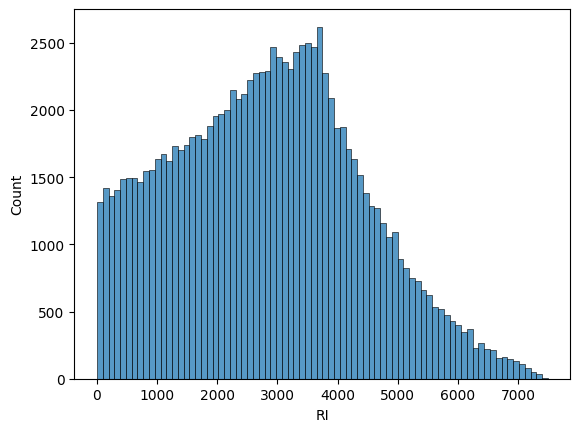

In [103]:
# hist plot RI of sensitive group
sns.histplot(data=df1530k[(df1530k.DSR_RATIO <=1) & (df1530k.SENS_FLG3 == 'sensitive') & (df1530k.RI < 8000)], x='RI')
plt.show()

In [104]:
print(df[df.INCOME_RANGE == '15-30k'].shape[0], 'Total INCOME_RANGE 15-30k')
print('----------')
print(c3_df.shape[0], 'กลุ่มมีหนี้เกินกว่าค่ากลาง')      # กลุ่มมีหนี้เกินกว่าค่ากลาง 
print(df1530k.shape[0], 'กลุ่มมีหนี้เกินกว่าค่ากลาง และ รายได้อยู่ในช่วง 15-30k' )   # กลุ่มมีหนี้เกินกว่าค่ากลาง และ รายได้อยู่ในช่วง 15-30k
print(df1530k[(df1530k.DSR_RATIO <=1)].shape[0], 'กลุ่มมีหนี้เกินกว่าค่ากลาง และ รายได้อยู่ในช่วง 15-30k และ DSR-ratio <=100%' )  # กลุ่มมีหนี้เกินกว่าค่ากลาง และ รายได้อยู่ในช่วง 15-30k และ ยังมีรายได้มากกว่าหนี้
df1530k[(df1530k.DSR_RATIO <=1)].groupby('SENS_FLG3')[['APPLY_NO']].count()  # 104901 คือกลุ่มที่มี DSR_RATIO มากกว่า 0.75

1317767 Total INCOME_RANGE 15-30k
----------
791920 กลุ่มมีหนี้เกินกว่าค่ากลาง
458688 กลุ่มมีหนี้เกินกว่าค่ากลาง และ รายได้อยู่ในช่วง 15-30k
357946 กลุ่มมีหนี้เกินกว่าค่ากลาง และ รายได้อยู่ในช่วง 15-30k และ DSR-ratio <=100%


APPLY_NO
SENS_FLG3              
not_sensitive    253045
sensitive        104901

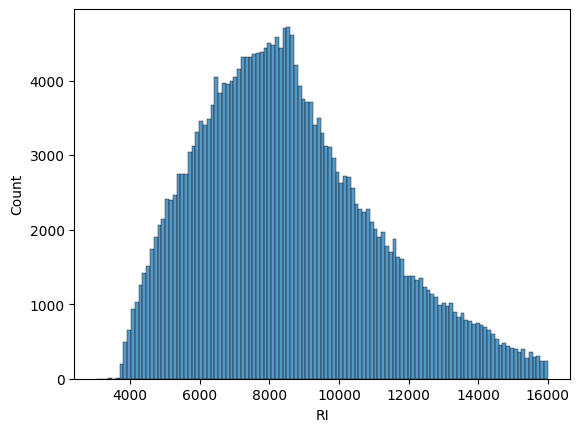

In [105]:
# hist plot RI of sensitive group
sns.histplot(data=df1530k[(df1530k.DSR_RATIO <=1) & (df1530k.SENS_FLG3 == 'not_sensitive') & (df1530k.RI < 16000)], x='RI')
plt.show()

## 30k up

In [106]:
df30k.head(5)

APPLY_NO      ID_NUMBER  CUST_TYPE_CD   APP_FINALIZE_DATE APP_STATUS_REASON ACC_DECISION PRODUCT_ID_DESC       DSR  OTHER_DSR  TOTAL_DSR  MONTHLY_INCOME  RECENT_INCOME  APPLY_AGE ASCORE_GRADE WAIVE_DOC_TYPE  LOAN_TYPE_ON_WAIVE                          OCCUPATION_DESC                    CLEAN_OCCUPATION_DESC                           company_desc                             business_desc  FINAL_INCOME        RI RI_15k RI_1530k RI_30k INCOME_RANGE RI_BOT  DSR_RATIO age_bin    cust_type_desc TOTAL_DSR_FLG HIGH_DEBT_FLG INCOME_RANGE2 RI_TBA                               occp_analy HIGH_DEBT_FLG2
15  2112012159  3250700094591          8.00  04JAN2022:17:15:17               A10     Approved              CC 15,027.27  13,442.00  28,469.27           34340      34,340.00         45           A+            NaN                 NaN                                    ตำรวจ                                ข้าราชการ                     รัฐบาล / ข้าราชการ   กองทัพบก / เรือ / อากาศ / สำนักงานตำรวจ     34,340.00  5,870.73   Pass     Pass   Pass          30k   Pass       0.83   40-49  O - ลูกค้าทั่วไป             Y             Y             Y   Pass                                ข้าราชการ              Y
16  2112012159  3250700094591          8.00  04JAN2022:17:15:17               A10     Approved              RL 15,027.27  13,442.00  28,469.27           34340      34,340.00         45           A+            NaN                 NaN                                    ตำรวจ                                ข้าราชการ                     รัฐบาล / ข้าราชการ   กองทัพบก / เรือ / อากาศ / สำนักงานตำรวจ     34,340.00  5,870.73   Pass     Pass   Pass          30k   Pass       0.83   40-49  O - ลูกค้าทั่วไป             Y             Y             Y   Pass                                ข้าราชการ              Y
21  2112014528  3160100517254          8.00  18JAN2022:14:32:19               A10     Approved              CC 20,440.17   4,336.00  24,776.17           35810      35,810.00         55           A+            NaN                 NaN                                     ทหาร                                ข้าราชการ                     รัฐบาล / ข้าราชการ   กองทัพบก / เรือ / อากาศ / สำนักงานตำรวจ     35,810.00 11,033.83   Pass     Pass   Pass          30k   Pass       0.69   50-59  O - ลูกค้าทั่วไป             Y             Y             Y   Pass                                ข้าราชการ              Y
22  2112014528  3160100517254          8.00  18JAN2022:14:32:19               A10     Approved              RL 20,440.17   4,336.00  24,776.17           35810      35,810.00         55           A+            NaN                 NaN                                     ทหาร                                ข้าราชการ                     รัฐบาล / ข้าราชการ   กองทัพบก / เรือ / อากาศ / สำนักงานตำรวจ     35,810.00 11,033.83   Pass     Pass   Pass          30k   Pass       0.69   50-59  O - ลูกค้าทั่วไป             Y             Y             Y   Pass                                ข้าราชการ              Y
24  2112015738  1509901350054          8.00  06JAN2022:12:59:52               D30     Declined              RL 46,029.43       0.00  46,029.43           50000      63,000.00         28            D            NaN                 NaN  พนักงานบริษัท/พนักงานประจำ/ลูกจ้างประจำ  พนักงานบริษัท/พนักงานประจำ/ลูกจ้างประจำ  เอกชน (บริษัท / หจก. / หน่วยงานเอกชน)  บริการ / บันเทิง / ท่องเที่ยว / ภัตตาคาร     50,000.00  3,970.57   Pass     Pass   Fail          30k   Fail       0.92   20-29  O - ลูกค้าทั่วไป             Y             Y             Y   Pass  พนักงานบริษัท/พนักงานประจำ/ลูกจ้างประจำ              Y

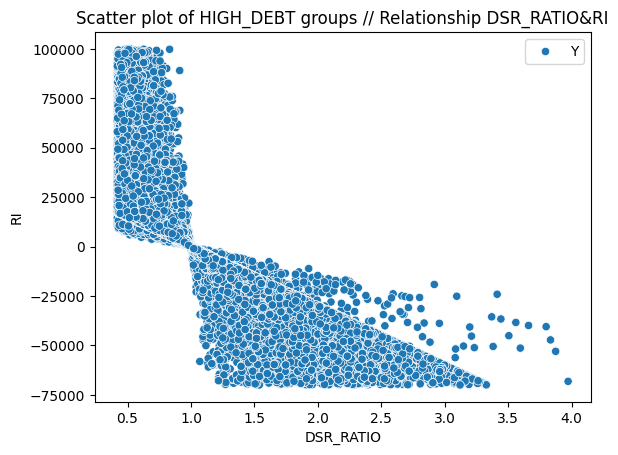

In [107]:
# scatter plot compare starting from GROUP who has DEBT
sns.scatterplot(data=df30k, x='DSR_RATIO', y="RI", hue = 'HIGH_DEBT_FLG')
plt.title(f'Scatter plot of HIGH_DEBT groups // Relationship DSR_RATIO&RI')
plt.legend()
plt.show()

In [108]:
# 15000-30000
df30k[['FINAL_INCOME', 'TOTAL_DSR', 'RI', 'DSR_RATIO', 'APPLY_AGE']].describe(pent_up).to_clipboard(excel=True)
df30k[['FINAL_INCOME', 'TOTAL_DSR', 'RI', 'DSR_RATIO', 'APPLY_AGE']].describe(pent_up)

FINAL_INCOME    TOTAL_DSR         RI  DSR_RATIO  APPLY_AGE
count    246,417.00   246,417.00 246,417.00 246,417.00 246,417.00
mean      49,136.86    41,365.62   7,380.72       0.86      42.00
std       29,155.80    28,386.47  19,216.88       0.38       8.76
min       30,000.00     6,355.00 -69,997.35       0.42      20.00
1%        30,000.00    13,740.00 -52,184.10       0.42      25.00
5%        30,220.00    16,221.73 -27,225.32       0.45      28.00
10%       31,170.00    18,494.60 -15,809.42       0.48      30.00
25%       34,110.00    24,129.20  -1,370.80       0.58      36.00
50%       40,490.00    33,922.00   9,492.00       0.77      42.00
75%       52,660.00    49,260.00  17,515.70       1.03      48.00
90%       73,262.00    71,570.65  25,857.40       1.36      54.00
95%       96,448.60    90,825.74  33,900.70       1.60      57.00
99%      166,666.67   144,633.80  60,068.22       2.14      60.00
max    2,184,652.00 1,273,932.00  99,962.17       3.97      85.00

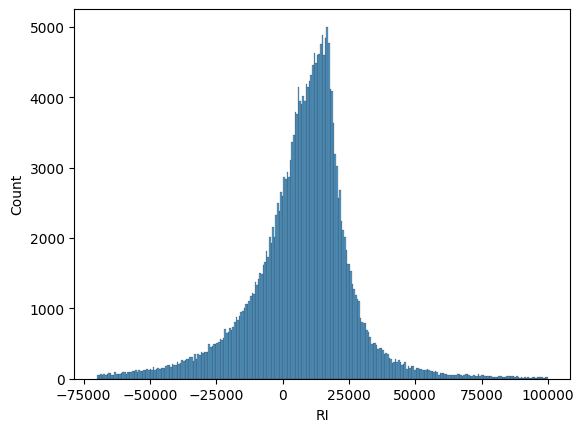

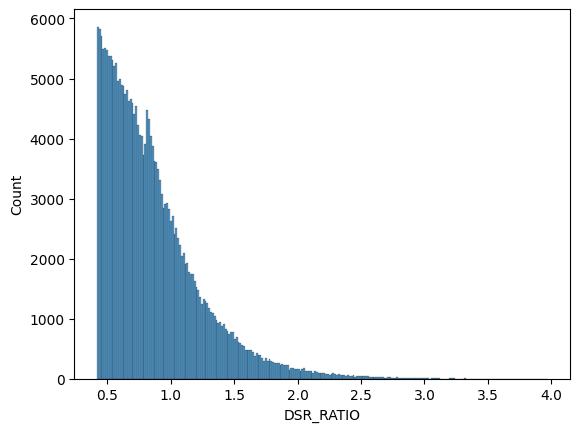

In [109]:
# distribution of c3_df
for val in ['RI', 'DSR_RATIO']:
    sns.histplot(data=df30k, x=val)
    plt.show()

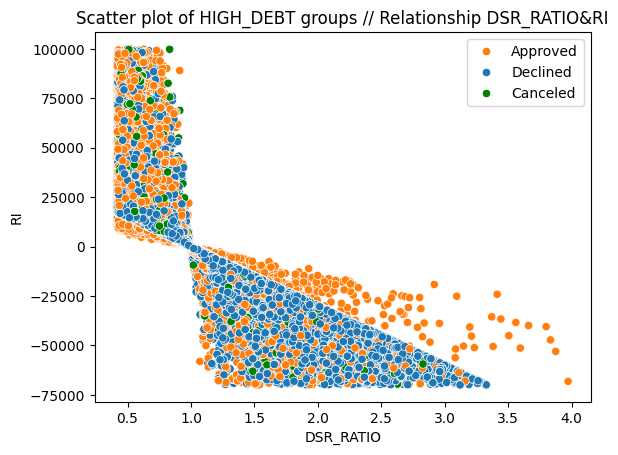

In [110]:
# scatter plot compare starting from GROUP who has DEBT
palette ={"Canceled": "green", "Approved": "C1", "Declined": "C0"}
sns.scatterplot(data=df30k, x='DSR_RATIO', y="RI", hue = 'ACC_DECISION', palette = palette)
plt.title(f'Scatter plot of HIGH_DEBT groups // Relationship DSR_RATIO&RI')
plt.legend()
plt.show()

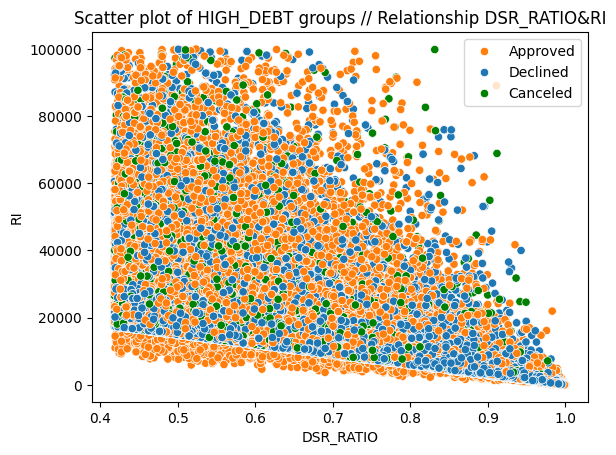

In [111]:
# scatter plot compare starting from GROUP who has DEBT
palette ={"Canceled": "green", "Approved": "C1", "Declined": "C0"}
sns.scatterplot(data=df30k[df30k.DSR_RATIO <= 1], x='DSR_RATIO', y="RI", hue = 'ACC_DECISION', palette = palette)
plt.title(f'Scatter plot of HIGH_DEBT groups // Relationship DSR_RATIO&RI')
plt.legend()
plt.show()

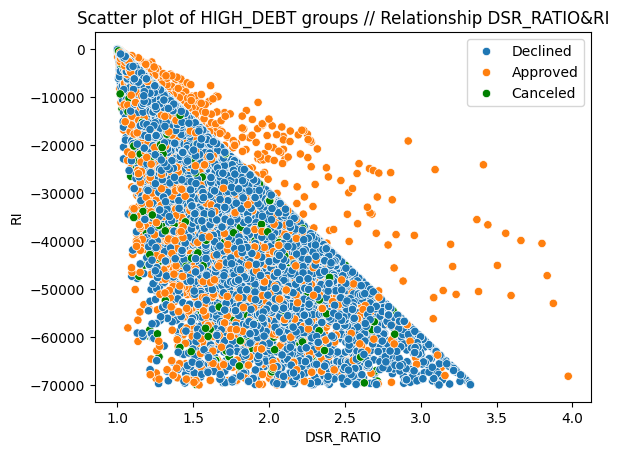

In [112]:
# scatter plot compare starting from GROUP who has DSR_RATIO > 1
palette ={"Canceled": "green", "Approved": "C1", "Declined": "C0"}
sns.scatterplot(data=df30k[df30k.DSR_RATIO > 1], x='DSR_RATIO', y="RI", hue = 'ACC_DECISION', 
                palette = palette, markers=markers)
plt.title(f'Scatter plot of HIGH_DEBT groups // Relationship DSR_RATIO&RI')
plt.legend()
plt.show()

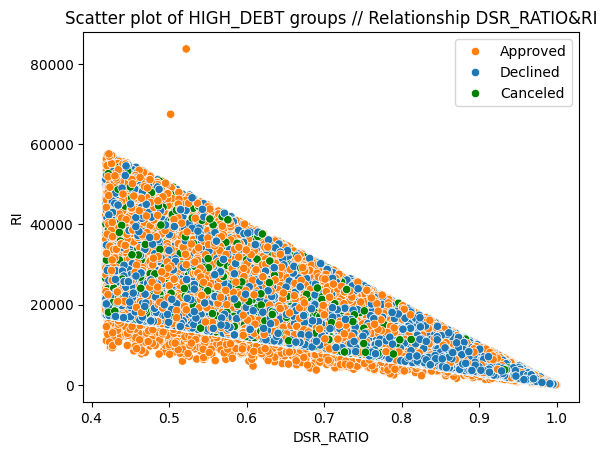

In [113]:
# scatter plot compare starting from GROUP who has DEBT and FINAL_INCOME < 95 percentile

# ลดความ hetero
palette ={"Canceled": "green", "Approved": "C1", "Declined": "C0"}
sns.scatterplot(data=df30k[(df30k.DSR_RATIO <= 1)&(df30k.FINAL_INCOME < 100000)], x='DSR_RATIO', y="RI", hue = 'ACC_DECISION', palette = palette)
plt.title(f'Scatter plot of HIGH_DEBT groups // Relationship DSR_RATIO&RI')
plt.legend()
plt.show()

In [114]:
df30k[(df30k.DSR_RATIO <= 1)&(df30k.FINAL_INCOME < 100000)][['FINAL_INCOME']].describe(pent_up).to_clipboard(excel=True)

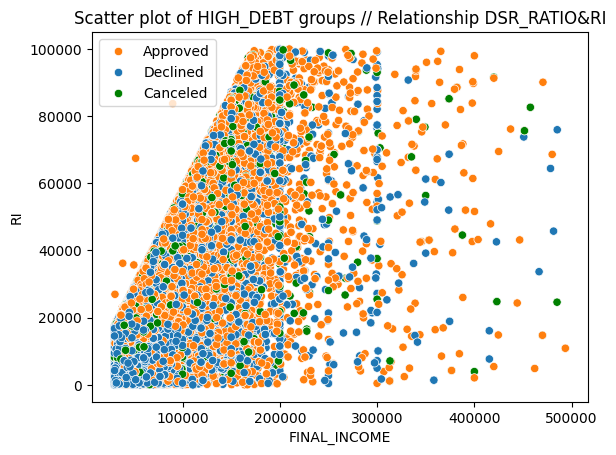

In [115]:
# scatter plot compare starting from GROUP who has DEBT
# palette ={"Approved": "C1", "Declined": "C0", "Canceled": "green"}
sns.scatterplot(data=df30k[(df30k.DSR_RATIO <= 1)&(df30k.FINAL_INCOME < 500000)], x='FINAL_INCOME', y="RI", hue = 'ACC_DECISION', palette = palette)
plt.title(f'Scatter plot of HIGH_DEBT groups // Relationship DSR_RATIO&RI')
plt.legend()
plt.show()

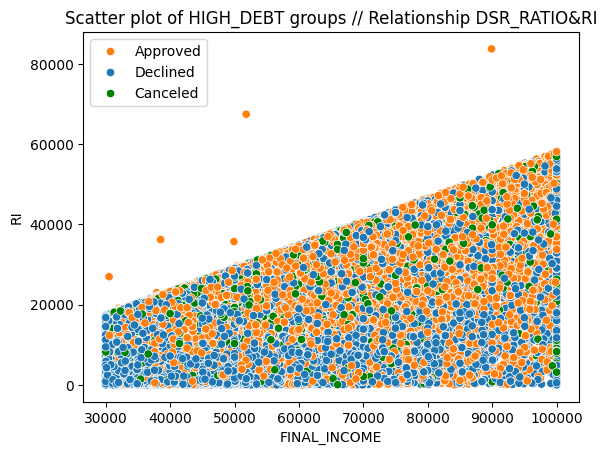

In [116]:
# scatter plot compare starting from GROUP who has DEBT
# palette ={"Approved": "C1", "Declined": "C0", "Canceled": "green"}
sns.scatterplot(data=df30k[(df30k.DSR_RATIO <= 1)&(df30k.FINAL_INCOME <= 100000)], x='FINAL_INCOME',
                y="RI", hue = 'ACC_DECISION', palette = palette)
plt.title(f'Scatter plot of HIGH_DEBT groups // Relationship DSR_RATIO&RI')
plt.legend()
plt.show()

In [117]:
# create flg กลุ่มเปาะบาง (รายได้ไม่สูงมาก และ DSR_RATIO ใกล้ 1)
df30k['SENS_FLG'] = df30k['DSR_RATIO'].apply(lambda x : 'not_sensitive' if x <= 0.65 else 'sensitive')
df30k['SENS_FLG2'] = df30k['DSR_RATIO'].apply(lambda x : 'not_sensitive' if x <= 0.75 else 'sensitive')
df30k['SENS_FLG3'] = df30k['DSR_RATIO'].apply(lambda x : 'not_sensitive' if x <= 0.85 else 'sensitive')

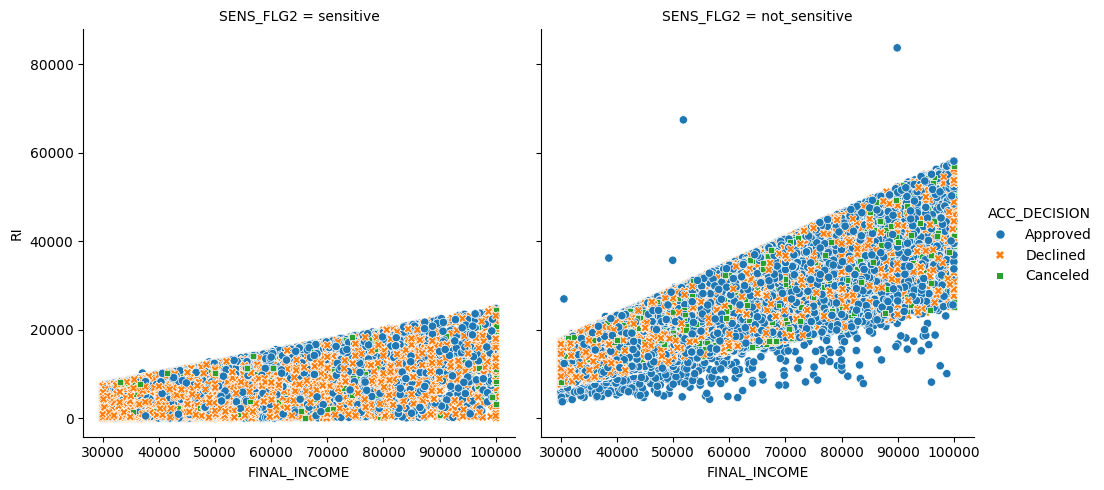

In [132]:
# flg2 75%
sns.relplot(
    data=df30k[(df30k.DSR_RATIO <= 1)&(df30k.FINAL_INCOME <= 100000)], x="FINAL_INCOME", y="RI",
    col="SENS_FLG2", hue="ACC_DECISION", style="ACC_DECISION",
    kind="scatter"
)
plt.show()

In [133]:
# summary stat on FLG2 75%
df30k[(df30k.DSR_RATIO <=1) & (df30k.SENS_FLG2 == 'sensitive')&(df30k.FINAL_INCOME <= 100000)][['RI',
                                                                       'FINAL_INCOME',
                                                                       'DSR_RATIO']].describe(pent_up).to_clipboard(excel=True)

df30k[(df30k.DSR_RATIO <=1) & (df30k.SENS_FLG2 == 'sensitive')&(df30k.FINAL_INCOME <= 100000)][['RI',
                                                                       'FINAL_INCOME',
                                                                       'DSR_RATIO']].describe(pent_up)

RI  FINAL_INCOME  DSR_RATIO
count 59,449.00     59,449.00  59,449.00
mean   5,975.88     44,551.04       0.87
std    3,829.21     14,376.54       0.07
min        0.00     30,000.00       0.75
1%       140.20     30,000.00       0.75
5%       661.05     30,280.00       0.76
10%    1,298.17     31,235.00       0.77
25%    3,143.20     34,070.00       0.81
50%    5,665.75     40,000.00       0.86
75%    8,007.00     50,010.00       0.92
90%   10,850.84     64,820.00       0.97
95%   12,959.51     75,050.60       0.98
99%   18,002.36     95,035.40       1.00
max   24,897.60    100,000.00       1.00

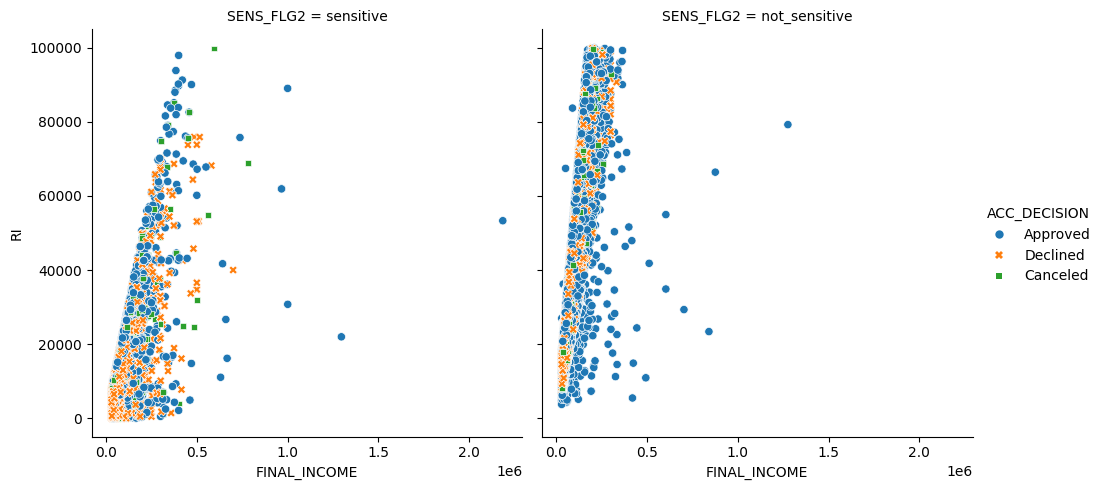

In [131]:
# flg2 75% ไม่ตัด final income
sns.relplot(
    data=df30k[(df30k.DSR_RATIO <= 1)], x="FINAL_INCOME", y="RI",
    col="SENS_FLG2", hue="ACC_DECISION", style="ACC_DECISION",
    kind="scatter"
)
plt.show()

In [134]:
# summary stat on FLG2 75%
df30k[(df30k.DSR_RATIO <=1) & (df30k.SENS_FLG2 == 'sensitive')][['RI',
                                                                       'FINAL_INCOME',
                                                                       'DSR_RATIO']].describe(pent_up).to_clipboard(excel=True)

df30k[(df30k.DSR_RATIO <=1) & (df30k.SENS_FLG2 == 'sensitive')][['RI',
                                                                       'FINAL_INCOME',
                                                                       'DSR_RATIO']].describe(pent_up)

RI  FINAL_INCOME  DSR_RATIO
count 62,037.00     62,037.00  62,037.00
mean   6,646.16     49,665.36       0.87
std    5,914.03     34,338.88       0.07
min        0.00     30,000.00       0.75
1%       144.13     30,000.00       0.75
5%       681.79     30,320.00       0.76
10%    1,333.75     31,340.00       0.77
25%    3,226.55     34,250.00       0.81
50%    5,808.70     40,410.00       0.86
75%    8,319.00     52,240.00       0.92
90%   11,817.26     72,250.00       0.97
95%   15,236.40     96,555.60       0.98
99%   29,522.79    186,397.12       1.00
max   99,772.52  2,184,652.00       1.00

In [135]:
# summary stat on FLG2 75%
df30k[(df30k.DSR_RATIO <=1) & (df30k.SENS_FLG2 == 'not_sensitive')&(df30k.FINAL_INCOME <= 100000)][['RI',
                                                                       'FINAL_INCOME',
                                                                       'DSR_RATIO']].describe(pent_up).to_clipboard(excel=True)

df30k[(df30k.DSR_RATIO <=1) & (df30k.SENS_FLG2 == 'not_sensitive')&(df30k.FINAL_INCOME <= 100000)][['RI',
                                                                       'FINAL_INCOME',
                                                                       'DSR_RATIO']].describe(pent_up)

RI  FINAL_INCOME  DSR_RATIO
count 111,397.00    111,397.00 111,397.00
mean   19,139.99     45,225.90       0.58
std     8,064.37     15,281.25       0.10
min     3,720.00     30,000.00       0.42
1%      8,290.38     30,000.00       0.42
5%      9,667.85     30,000.00       0.43
10%    10,861.62     30,922.00       0.45
25%    13,549.10     33,850.00       0.49
50%    17,287.95     40,000.00       0.57
75%    22,585.09     51,326.00       0.66
90%    29,782.45     67,326.00       0.71
95%    35,573.76     79,000.00       0.73
99%    47,024.63     97,157.04       0.75
max    83,705.10    100,000.00       0.75

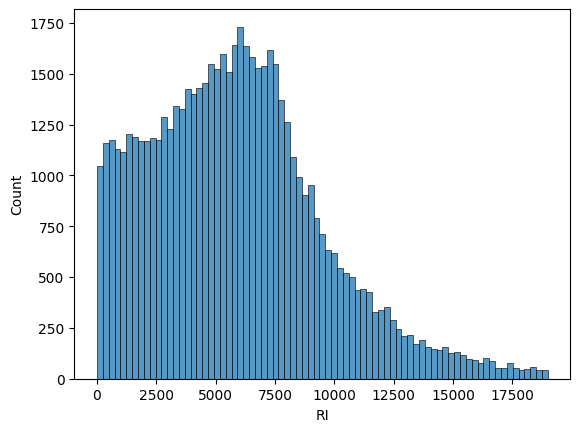

In [121]:
# hist plot RI of sensitive group
sns.histplot(data=df30k[(df30k.DSR_RATIO <=1) & (df30k.SENS_FLG2 == 'sensitive') 
             &(df30k.FINAL_INCOME <= 100000) & (df30k.RI < 19000)], x='RI')
plt.show()

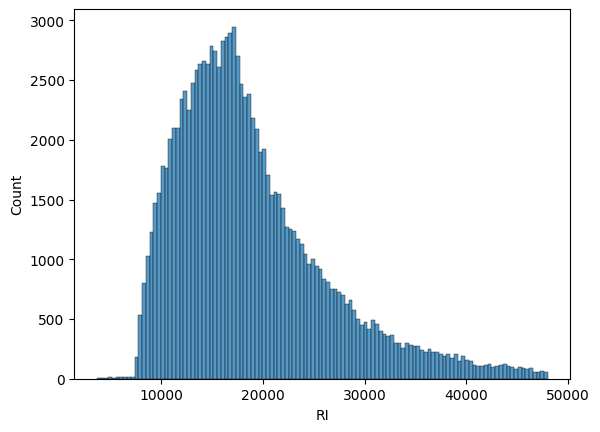

In [122]:
# hist plot RI of sensitive group
sns.histplot(data=df30k[(df30k.DSR_RATIO <=1) & (df30k.SENS_FLG2 == 'not_sensitive') 
             &(df30k.FINAL_INCOME <= 100000) & (df30k.RI < 48000)], x='RI')
plt.show()

In [136]:
print(df[df.INCOME_RANGE == '30k'].shape[0], 'Total INCOME_RANGE 30k')
print('----------')
print(c3_df.shape[0], 'กลุ่มมีหนี้เกินกว่าค่ากลาง')      # กลุ่มมีหนี้เกินกว่าค่ากลาง 
print(df30k.shape[0], 'กลุ่มมีหนี้เกินกว่าค่ากลาง และ รายได้อยู่ในช่วง 30k' )   # กลุ่มมีหนี้เกินกว่าค่ากลาง และ รายได้อยู่ในช่วง 15-30k
print(df30k[(df30k.DSR_RATIO <=1)].shape[0], 'กลุ่มมีหนี้เกินกว่าค่ากลาง และ รายได้อยู่ในช่วง 30k และ DSR-ratio <=100%' )  # กลุ่มมีหนี้เกินกว่าค่ากลาง และ รายได้อยู่ในช่วง 15-30k และ ยังมีรายได้มากกว่าหนี้
print(df30k[(df30k.DSR_RATIO <=1)&(df30k.FINAL_INCOME <= 100000)].shape[0], 'กลุ่มมีหนี้เกินกว่าค่ากลาง และ รายได้อยู่ในช่วง 30k และ DSR-ratio <=100% และ income <= 100000' ) 
df30k[(df30k.DSR_RATIO <=1)].groupby('SENS_FLG3')[['APPLY_NO']].count()  # คือกลุ่มที่มี DSR_RATIO มากกว่า 0.75 

589614 Total INCOME_RANGE 30k
----------
791920 กลุ่มมีหนี้เกินกว่าค่ากลาง
246417 กลุ่มมีหนี้เกินกว่าค่ากลาง และ รายได้อยู่ในช่วง 30k
178937 กลุ่มมีหนี้เกินกว่าค่ากลาง และ รายได้อยู่ในช่วง 30k และ DSR-ratio <=100%
170846 กลุ่มมีหนี้เกินกว่าค่ากลาง และ รายได้อยู่ในช่วง 30k และ DSR-ratio <=100% และ income <= 100000


APPLY_NO
SENS_FLG3              
not_sensitive    145299
sensitive         33638

In [137]:
df30k[(df30k.DSR_RATIO <=1)&(df30k.FINAL_INCOME <= 100000)].groupby('SENS_FLG3')[['APPLY_NO']].count()  # 104901 คือกลุ่มที่มี DSR_RATIO มากกว่า 0.75 

APPLY_NO
SENS_FLG3              
not_sensitive    138561
sensitive         32285

## 15k down

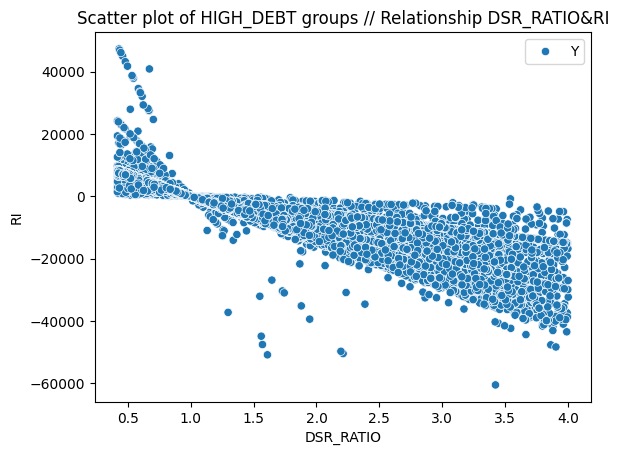

In [124]:
# scatter plot compare starting from GROUP who has DEBT
sns.scatterplot(data=df15k, x='DSR_RATIO', y="RI", hue = 'HIGH_DEBT_FLG')
plt.title(f'Scatter plot of HIGH_DEBT groups // Relationship DSR_RATIO&RI')
plt.legend()
plt.show()

In [138]:
# 15000-30000
df15k[['FINAL_INCOME', 'TOTAL_DSR', 'RI', 'DSR_RATIO', 'APPLY_AGE']].describe(pent_up).to_clipboard(excel=True)
df15k[['FINAL_INCOME', 'TOTAL_DSR', 'RI', 'DSR_RATIO', 'APPLY_AGE']].describe(pent_up)

FINAL_INCOME  TOTAL_DSR         RI  DSR_RATIO  APPLY_AGE
count     86,815.00  86,815.00  86,815.00  86,815.00  86,815.00
mean      11,918.21  11,356.40     700.30       0.99      34.40
std        2,472.03   6,638.61   6,728.22       0.62       8.66
min            0.00     321.28 -60,545.60       0.42      20.00
1%         3,924.94   3,458.29 -24,995.30       0.42      21.00
5%         6,301.40   5,191.90 -12,837.64       0.45      23.00
10%        8,937.00   5,805.70  -7,640.00       0.48      25.00
25%       10,729.00   7,103.28  -1,532.51       0.58      28.00
50%       12,543.00   9,516.00   2,531.90       0.79      33.00
75%       13,500.00  13,373.51   5,209.13       1.14      40.00
90%       14,310.00  19,088.27   6,672.40       1.76      47.00
95%       14,600.00  24,238.56   7,236.13       2.37      51.00
99%       14,900.00  37,336.72   8,027.26       3.49      58.00
max       14,999.00 162,266.70  47,281.00       4.00      85.00

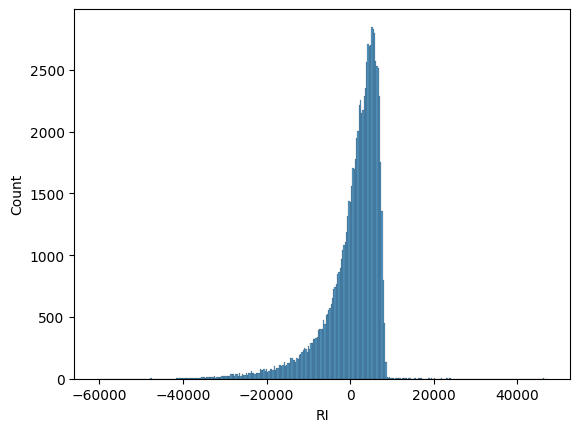

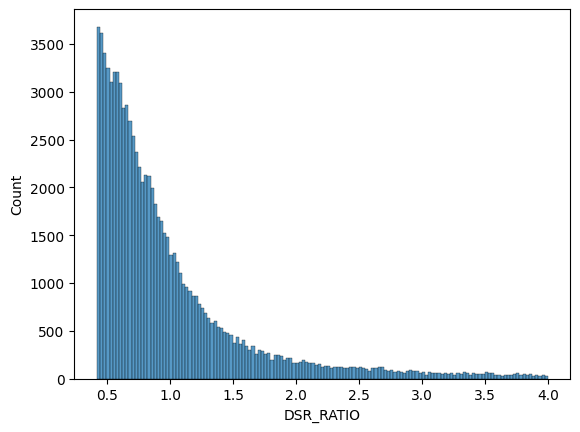

In [144]:
# distribution of c3_df
for val in ['RI', 'DSR_RATIO']:
    sns.histplot(data=df15k, x=val)
    plt.show()

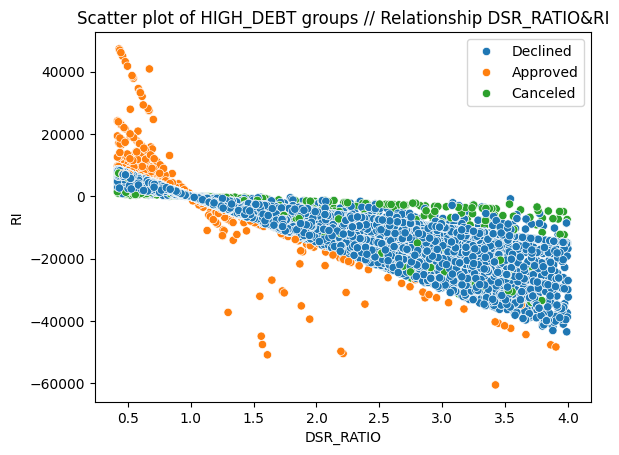

In [145]:
# scatter plot compare starting from GROUP who has DEBT
sns.scatterplot(data=df15k, x='DSR_RATIO', y="RI", hue = 'ACC_DECISION')
plt.title(f'Scatter plot of HIGH_DEBT groups // Relationship DSR_RATIO&RI')
plt.legend()
plt.show()

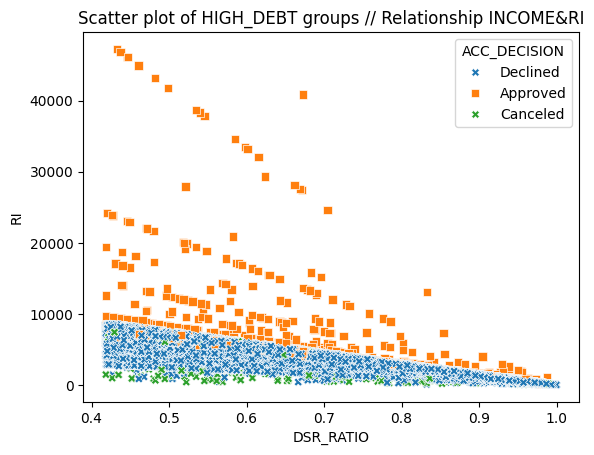

In [146]:
# scatter plot compare starting from GROUP who has DEBT
markers = {"Approved": "s", "Declined": "X", "Canceled":"X"}
sns.scatterplot(data=df15k[df15k.DSR_RATIO <=1], x='DSR_RATIO', y="RI", 
                hue = 'ACC_DECISION', style = 'ACC_DECISION', markers=markers
               )
plt.title(f'Scatter plot of HIGH_DEBT groups // Relationship INCOME&RI')
plt.show()

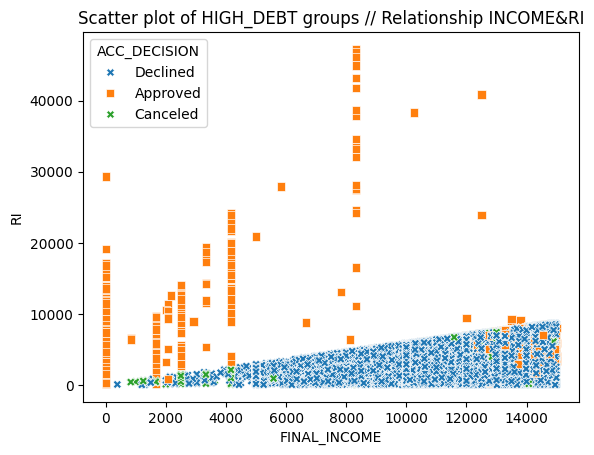

In [163]:
# scatter plot compare starting from GROUP who has DEBT
markers = {"Approved": "s", "Declined": "X", "Canceled":"X"}
sns.scatterplot(data=df15k[df15k.DSR_RATIO <=1], x='FINAL_INCOME', y="RI", 
                hue = 'ACC_DECISION', style = 'ACC_DECISION', markers=markers
               )
plt.title(f'Scatter plot of HIGH_DEBT groups // Relationship INCOME&RI')
plt.show()

In [170]:
# create flg DSR_RATIO to define กลุ่มเปาะบาง
# กลุ่มเปาะบาง คือ กลุ่มที่ RI น้อยมากๆหลังชำระหนี้
df15k['SENS_FLG2'] = df15k['DSR_RATIO'].apply(lambda x : 'not_sensitive' if x <= 0.65 else 'sensitive')

In [176]:
df15k[(df15k.FINAL_INCOME < 2000)& (df15k.DSR_RATIO<=1)&(df15k.ACC_DECISION == 'Approved')&(df15k.CUST_TYPE_CD != 16 )]

APPLY_NO      ID_NUMBER  CUST_TYPE_CD   APP_FINALIZE_DATE APP_STATUS_REASON ACC_DECISION PRODUCT_ID_DESC       DSR  OTHER_DSR  TOTAL_DSR  MONTHLY_INCOME  RECENT_INCOME  APPLY_AGE ASCORE_GRADE WAIVE_DOC_TYPE  LOAN_TYPE_ON_WAIVE                          OCCUPATION_DESC                    CLEAN_OCCUPATION_DESC                           company_desc                                      business_desc  FINAL_INCOME        RI RI_15k RI_1530k RI_30k INCOME_RANGE RI_BOT  DSR_RATIO age_bin    cust_type_desc TOTAL_DSR_FLG HIGH_DEBT_FLG INCOME_RANGE2 RI_TBA                               occp_analy HIGH_DEBT_FLG2      SENS_FLG2
478963   2206063541  3720400401485         15.00  20JUN2022:18:07:31               A10     Approved              RL  6,691.35       0.00   6,691.35           15000           0.00         40           D-            NaN                 NaN                               อื่นๆ ระบุ               รับจ้างทั่วไป / อาชีพอิสระ             รับจ้างทั่วไป / อาชีพอิสระ           บริการ / บันเทิง / ท่องเที่ยว / ภัตตาคาร          0.00  8,308.65   Pass     Pass   Pass         <15k   Pass       0.45   40-49   S - Self Employ             Y             Y             N   Fail                                    other              Y  not_sensitive
481895   2206066358  1100700170518          8.00  21JUN2022:12:22:26               A10     Approved              RL  7,928.70       0.00   7,928.70           12000           0.00         37           D+            NaN                 NaN  พนักงานบริษัท/พนักงานประจำ/ลูกจ้างประจำ  พนักงานบริษัท/พนักงานประจำ/ลูกจ้างประจำ  เอกชน (บริษัท / หจก. / หน่วยงานเอกชน)                                          ประกันภัย          0.00  4,071.30   Pass     Pass   Pass         <15k   Pass       0.66   30-39  O - ลูกค้าทั่วไป             Y             Y             N   Fail  พนักงานบริษัท/พนักงานประจำ/ลูกจ้างประจำ              Y      sensitive
489517   2206073305  3100203579015          8.00  22JUN2022:18:56:04               A10     Approved              RL  5,887.13       0.00   5,887.13           12000           0.00         58            B            NaN                 NaN    พนักงานทำความสะอาด / แม่บ้าน / ภารโรง    พนักงานทำความสะอาด / แม่บ้าน / ภารโรง  เอกชน (บริษัท / หจก. / หน่วยงานเอกชน)          ธนาคาร / สถาบันการเงิน / บริษัทหลักทรัพย์          0.00  6,112.87   Pass     Pass   Pass         <15k   Pass       0.49   50-59  O - ลูกค้าทั่วไป             Y             Y             N   Fail                                    other              Y  not_sensitive
491108   2206074673  3700800343482          8.00  23JUN2022:11:36:38               A10     Approved              RL  8,954.00     975.00   9,929.00           12000           0.00         42           D+            NaN                 NaN                               อื่นๆ ระบุ     อื่นๆ ระบุ .........................   อื่นๆ ระบุ .........................  อื่นๆ ระบุ ......................................          0.00  2,071.00   Pass     Pass   Pass         <15k   Pass       0.83   40-49  O - ลูกค้าทั่วไป             Y             Y             N   Fail                                    other              Y      sensitive
493534   2206076736  1120100135398          8.00  23JUN2022:17:07:15               A10     Approved              RL 24,066.20       0.00  24,066.20           30000           0.00         34           D-            NaN                 NaN                          พ่อค้า / แม่ค้า                          พ่อค้า / แม่ค้า             รับจ้างทั่วไป / อาชีพอิสระ                 การค้าปลีก / ค้าส่ง/ห้างสรรพสินค้า          0.00  5,933.80   Pass     Pass   Pass         <15k   Pass       0.80   30-39  O - ลูกค้าทั่วไป             Y             Y             N   Fail                                    other              Y      sensitive
...             ...            ...           ...                 ...               ...          ...             ...       ...        ...        ...             ...            ...        ...          ...     

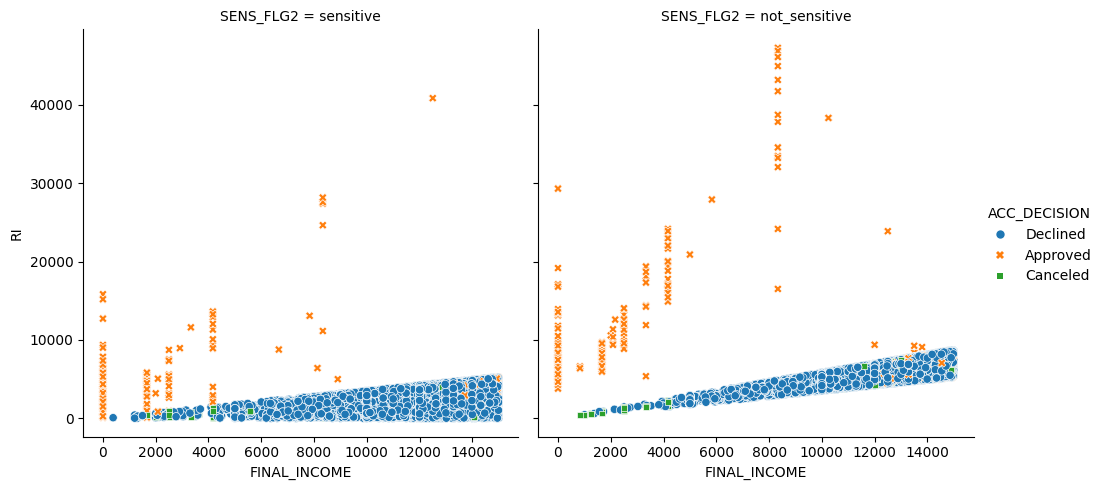

In [171]:
# flg3
sns.relplot(
    data=df15k[df15k.DSR_RATIO <=1], x="FINAL_INCOME", y="RI",
    col="SENS_FLG2", hue="ACC_DECISION", style="ACC_DECISION",
    kind="scatter"
)
plt.show()

In [172]:
# summary stat on FLG3
df15k[(df15k.DSR_RATIO <=1) & (df15k.SENS_FLG2 == 'sensitive')][['RI',
                                                                       'FINAL_INCOME',
                                                                       'DSR_RATIO']].describe(pent_up).to_clipboard(excel=True)

df15k[(df15k.DSR_RATIO <=1) & (df15k.SENS_FLG2 == 'sensitive')][['RI',
                                                                       'FINAL_INCOME',
                                                                       'DSR_RATIO']].describe(pent_up)

RI  FINAL_INCOME  DSR_RATIO
count 28,736.00     28,736.00  28,736.00
mean   2,430.82     12,296.20       0.81
std    1,393.69      2,110.23       0.10
min        0.00          0.00       0.65
1%        61.93      5,000.00       0.65
5%       291.95      8,568.00       0.66
10%      572.19     10,000.00       0.68
25%    1,333.00     11,732.00       0.72
50%    2,440.78     12,881.50       0.80
75%    3,505.62     13,620.00       0.89
90%    4,197.23     14,370.00       0.95
95%    4,473.60     14,630.00       0.98
99%    4,896.00     14,900.00       0.99
max   40,860.00     14,999.00       1.00